In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings
warnings.filterwarnings('ignore')

Problem statements:- The prediction task is to determine whether a person makes over $50K a year.

    This Discription of final weight has control by 3 sets which are 
    - A single cell estimate of the population 16+ for each state.
    - Controls for Hispanic Origin by age and sex.
    - Controls by Race, age and sex.
    and we use all these sets for prediction 

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# size of rows and columns 
'Rows:-',df.shape[0],'Columns:-',df.shape[1]

('Rows:-', 32560, 'Columns:-', 15)

In [6]:
# check null values:-
df.isnull().sum()    # There are no null values in dataset

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
# information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


there are some columns which are object type and some are numeric type we have to convert the all object columns into numeric for prediction 

In [9]:
df.nunique()


Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

As far i observe here, final weight ,capital gain,capital loss and age are the continous columns and rest are categorical columns 


In [10]:
for d in df.columns:
    print( d ,'have unique values = ',df[d].unique(),'\n *********************************************************')

Age have unique values =  [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 
 *********************************************************
Workclass have unique values =  [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 
 *********************************************************
Fnlwgt have unique values =  [ 83311 215646 234721 ...  34066  84661 257302] 
 *********************************************************
Education have unique values =  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 
 *********************************************************
Education_num have unique values =  [13  9  7 14  5 10 

# EDA

In [11]:
# see the target columns look like 
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

there are only two categories in traget variable either less than and equal to  50 thousand or greater than

<AxesSubplot:xlabel='Income', ylabel='count'>

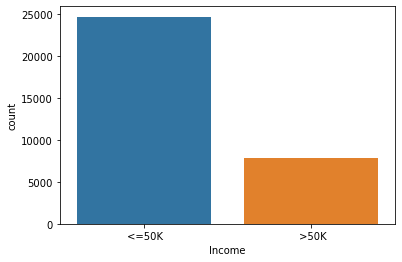

In [12]:
# Count the total data of target variable 
sb.countplot(df['Income'])

income more than 50k has very less as compared to less than equal to 50, which we can say imbalance data we need to balance it.

<AxesSubplot:xlabel='Age', ylabel='Density'>

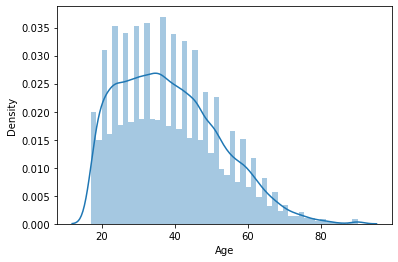

In [13]:
# Plot graph to age columns
sb.distplot(df['Age'])

Data of Age is little skewed in positive side, may be some of outliers are present 

<AxesSubplot:xlabel='Workclass', ylabel='count'>

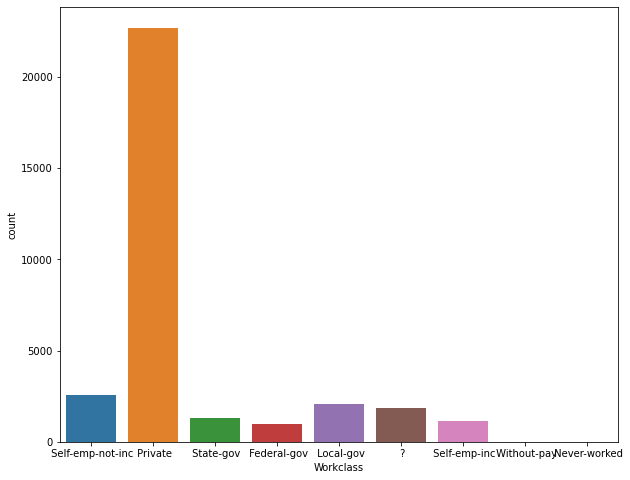

In [14]:
# working class
plt.figure(figsize=(10,8))
sb.countplot(df['Workclass'])

<AxesSubplot:xlabel='Workclass', ylabel='count'>

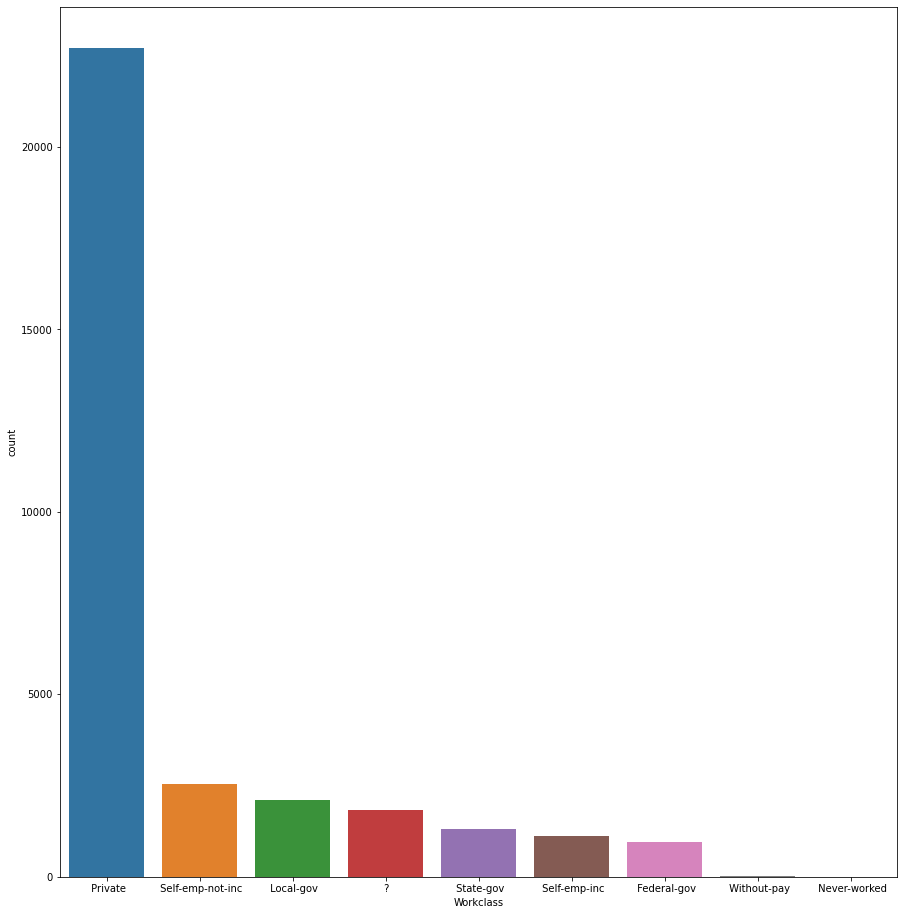

In [15]:
plt.figure(figsize=(15,16))
sb.countplot(df['Workclass'],order=df['Workclass'].value_counts().index)

I am seeing the "?" in categorical data that is the null values, we need to clean this datasets 

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

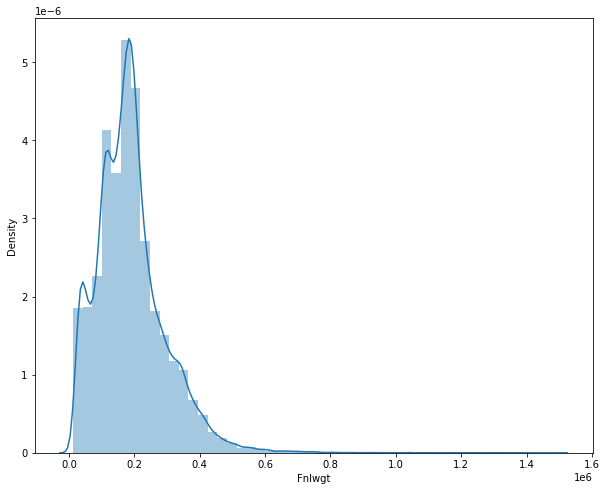

In [16]:
# final weight:-
plt.figure(figsize=(10,8))
sb.distplot(df['Fnlwgt'])

positively skewed,and also have lots of outliers 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

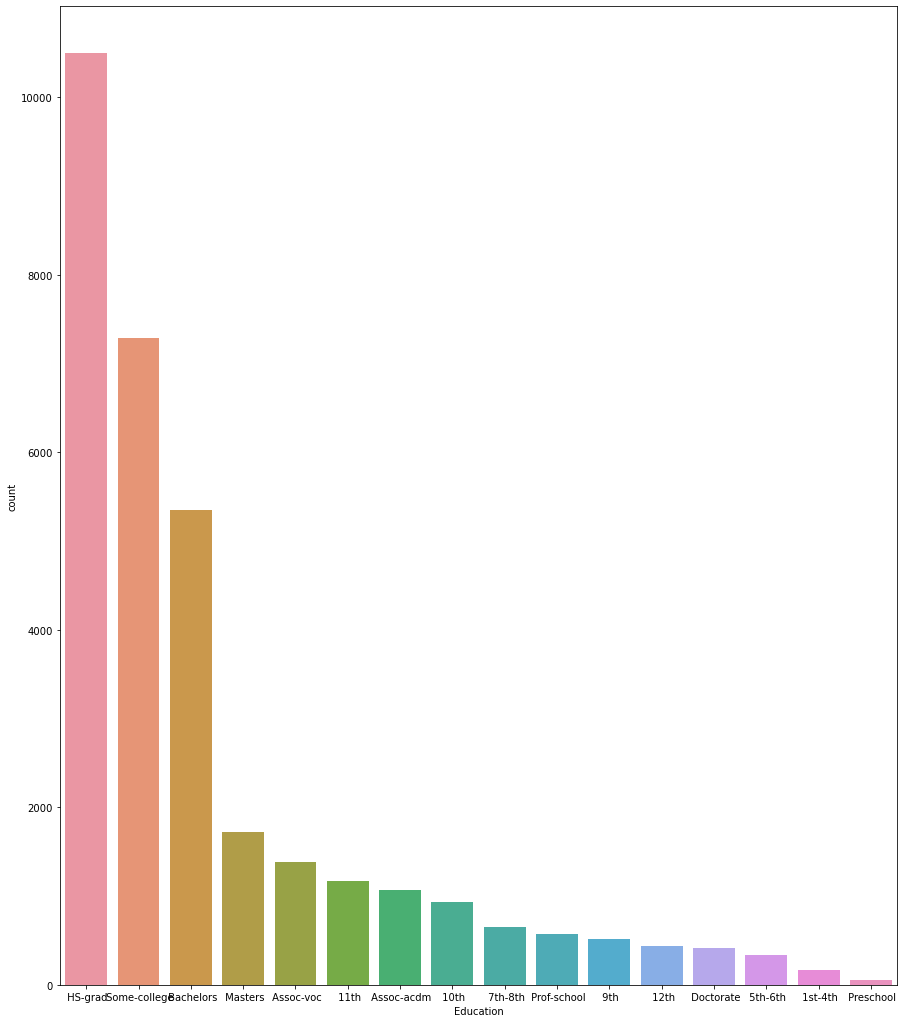

In [17]:
# Education:- 
print(df['Education'].value_counts())
plt.figure(figsize=(15,18))
sb.countplot(df['Education'],order=df['Education'].value_counts().index)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

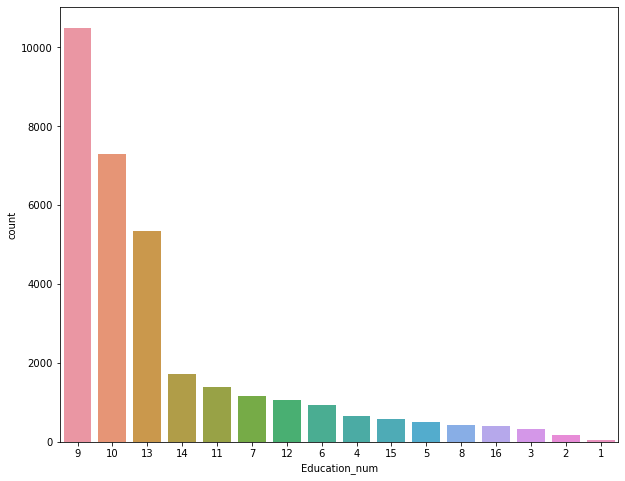

In [18]:
# Education_num:-
plt.figure(figsize=(10,8))
sb.countplot(df['Education_num'],order=df['Education_num'].value_counts().index)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

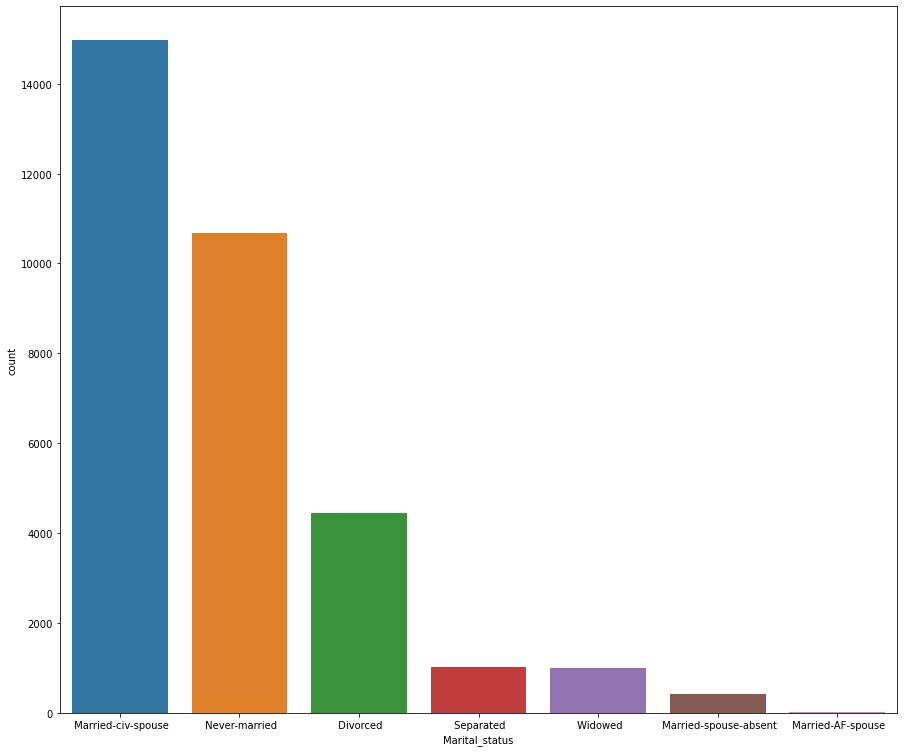

In [19]:
# Marital_status:-
plt.figure(figsize=(15,13))
sb.countplot(df['Marital_status'],order=df['Marital_status'].value_counts().index)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

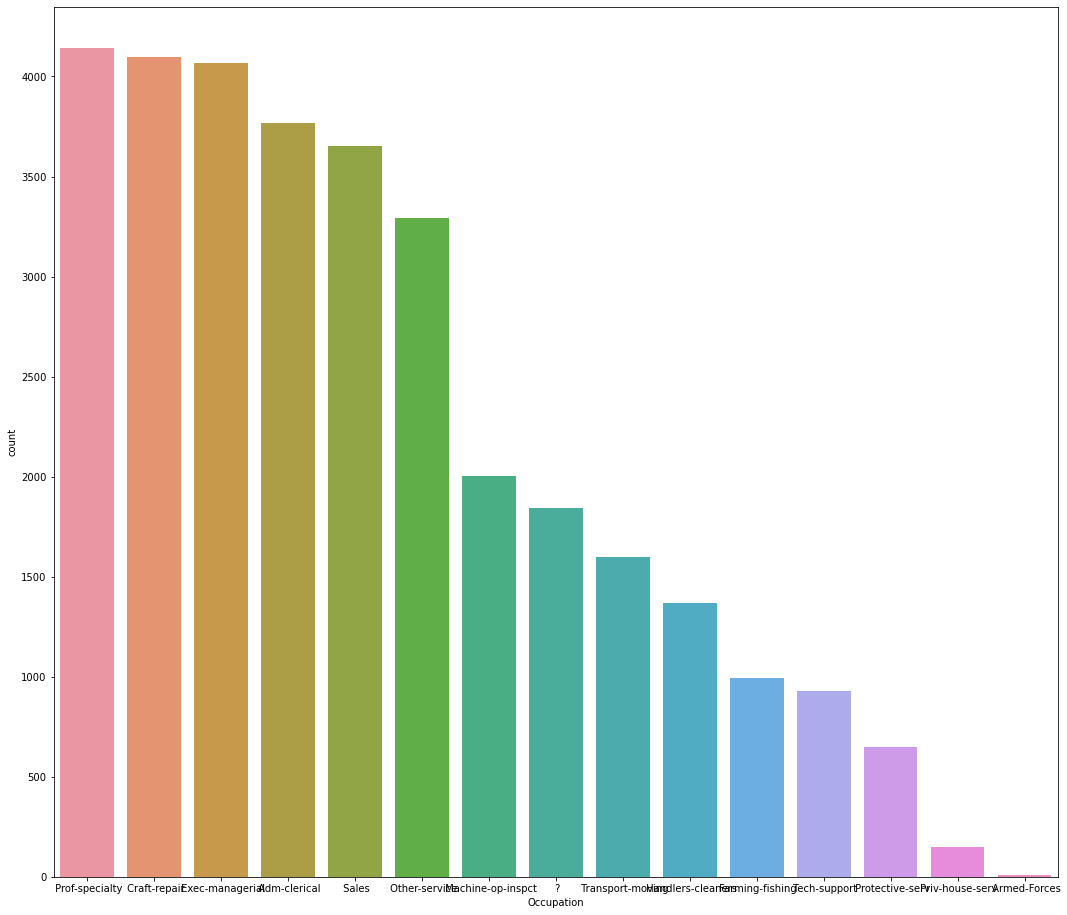

In [20]:
# Occupation:-
plt.figure(figsize=(18,16))
sb.countplot(df['Occupation'],order=df['Occupation'].value_counts().index)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

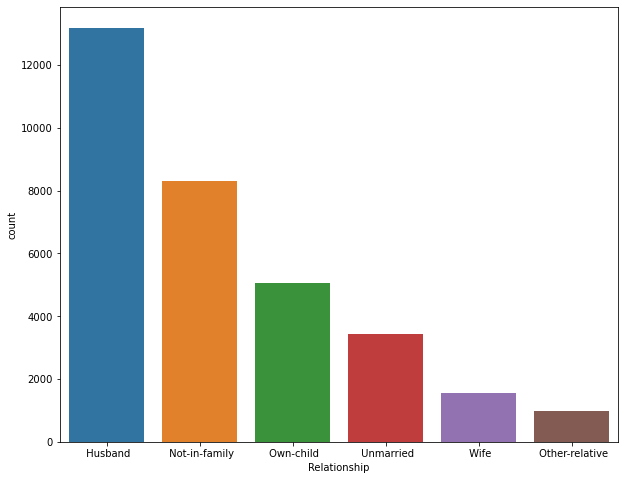

In [21]:
# Relationship:-
plt.figure(figsize=(10,8))
sb.countplot(df['Relationship'],order=df['Relationship'].value_counts().index)

<AxesSubplot:xlabel='Sex', ylabel='count'>

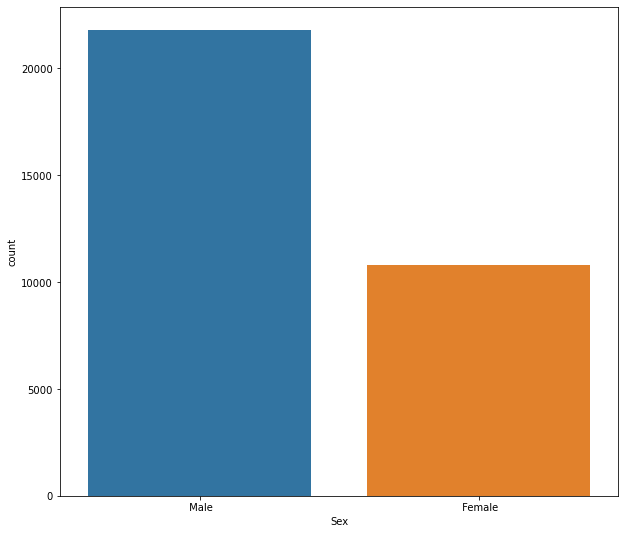

In [22]:
# sex:-
plt.figure(figsize=(10,9))
sb.countplot(df['Sex'],order=df['Sex'].value_counts().index)

<AxesSubplot:xlabel='Race', ylabel='count'>

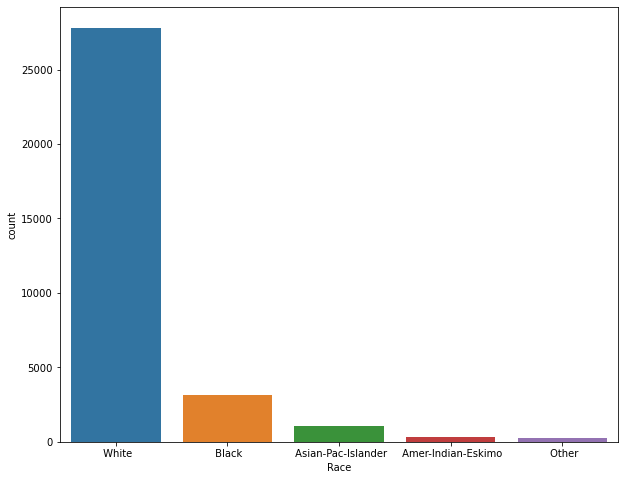

In [23]:
# race :-
plt.figure(figsize=(10,8))
sb.countplot(df['Race'],order=df['Race'].value_counts().index)

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

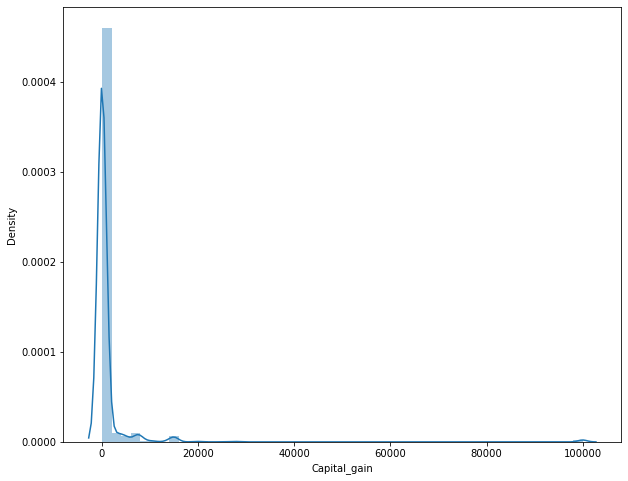

In [24]:
# capital gain:-
plt.figure(figsize=(10,8))
sb.distplot(df['Capital_gain'])

highly positevly skewed, and lots of outliers 

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

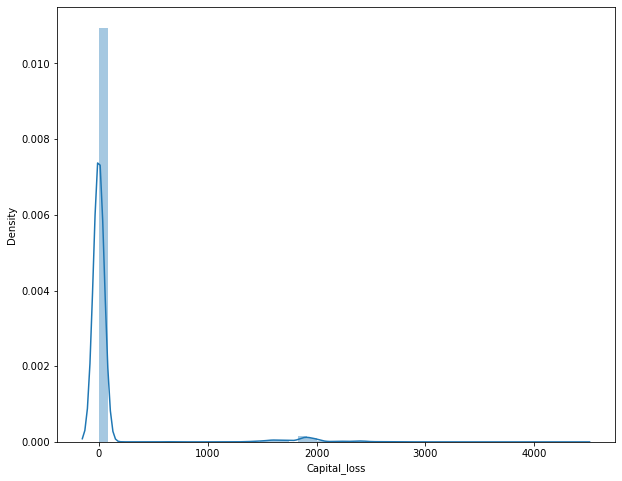

In [25]:
#capital loss:-
plt.figure(figsize=(10,8))
sb.distplot(df['Capital_loss'])

lots of outliers and positively skewed

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

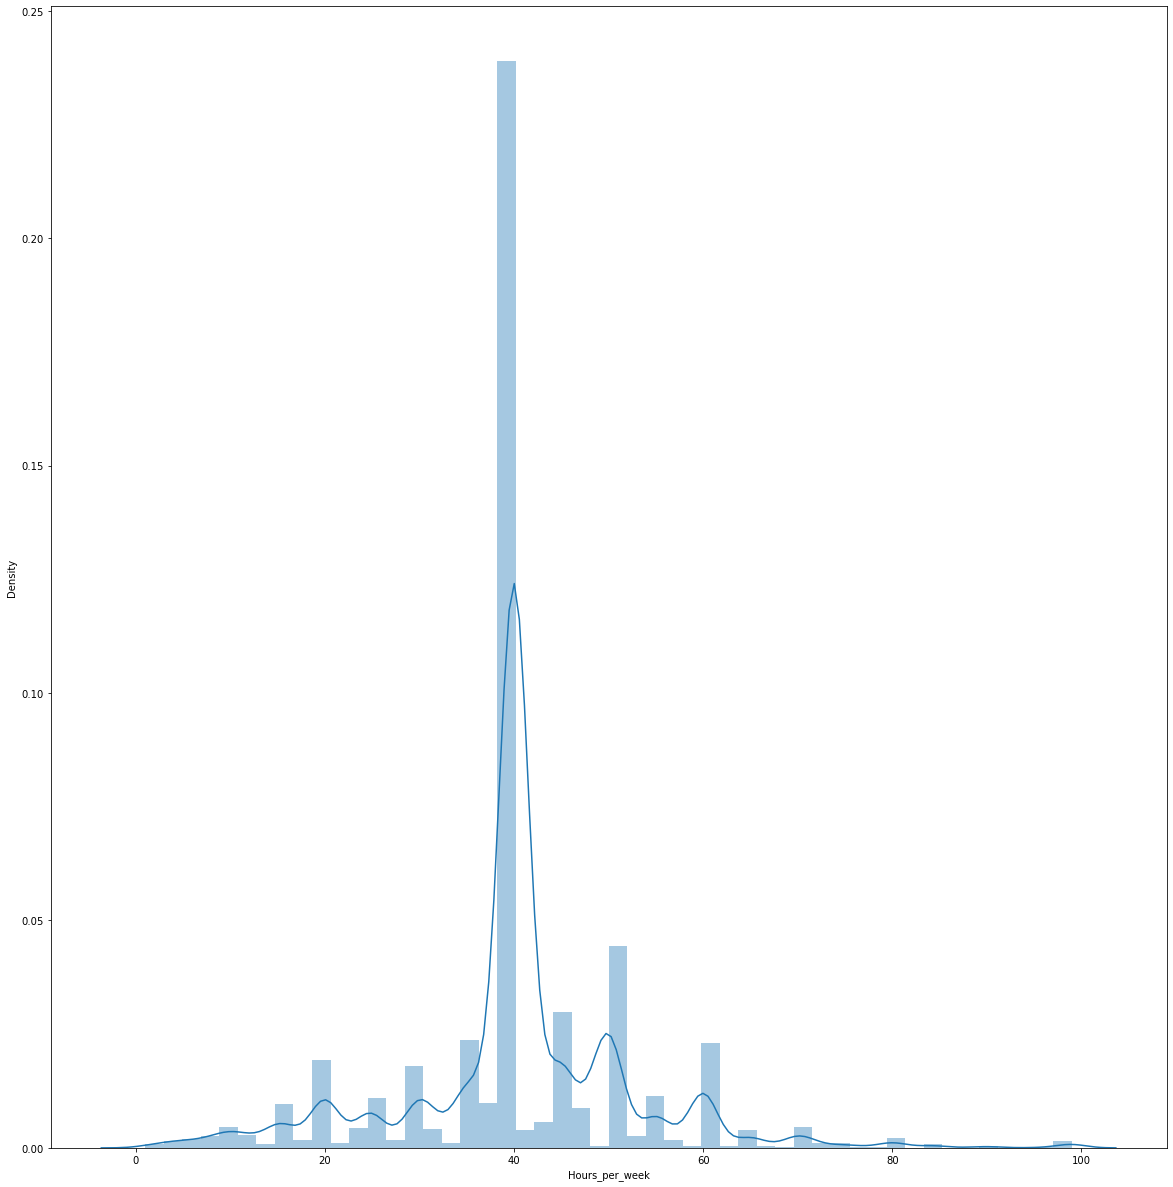

In [26]:
# Hours per week:-
plt.figure(figsize=(20,21))
sb.distplot(df['Hours_per_week'])

<AxesSubplot:xlabel='Native_country', ylabel='count'>

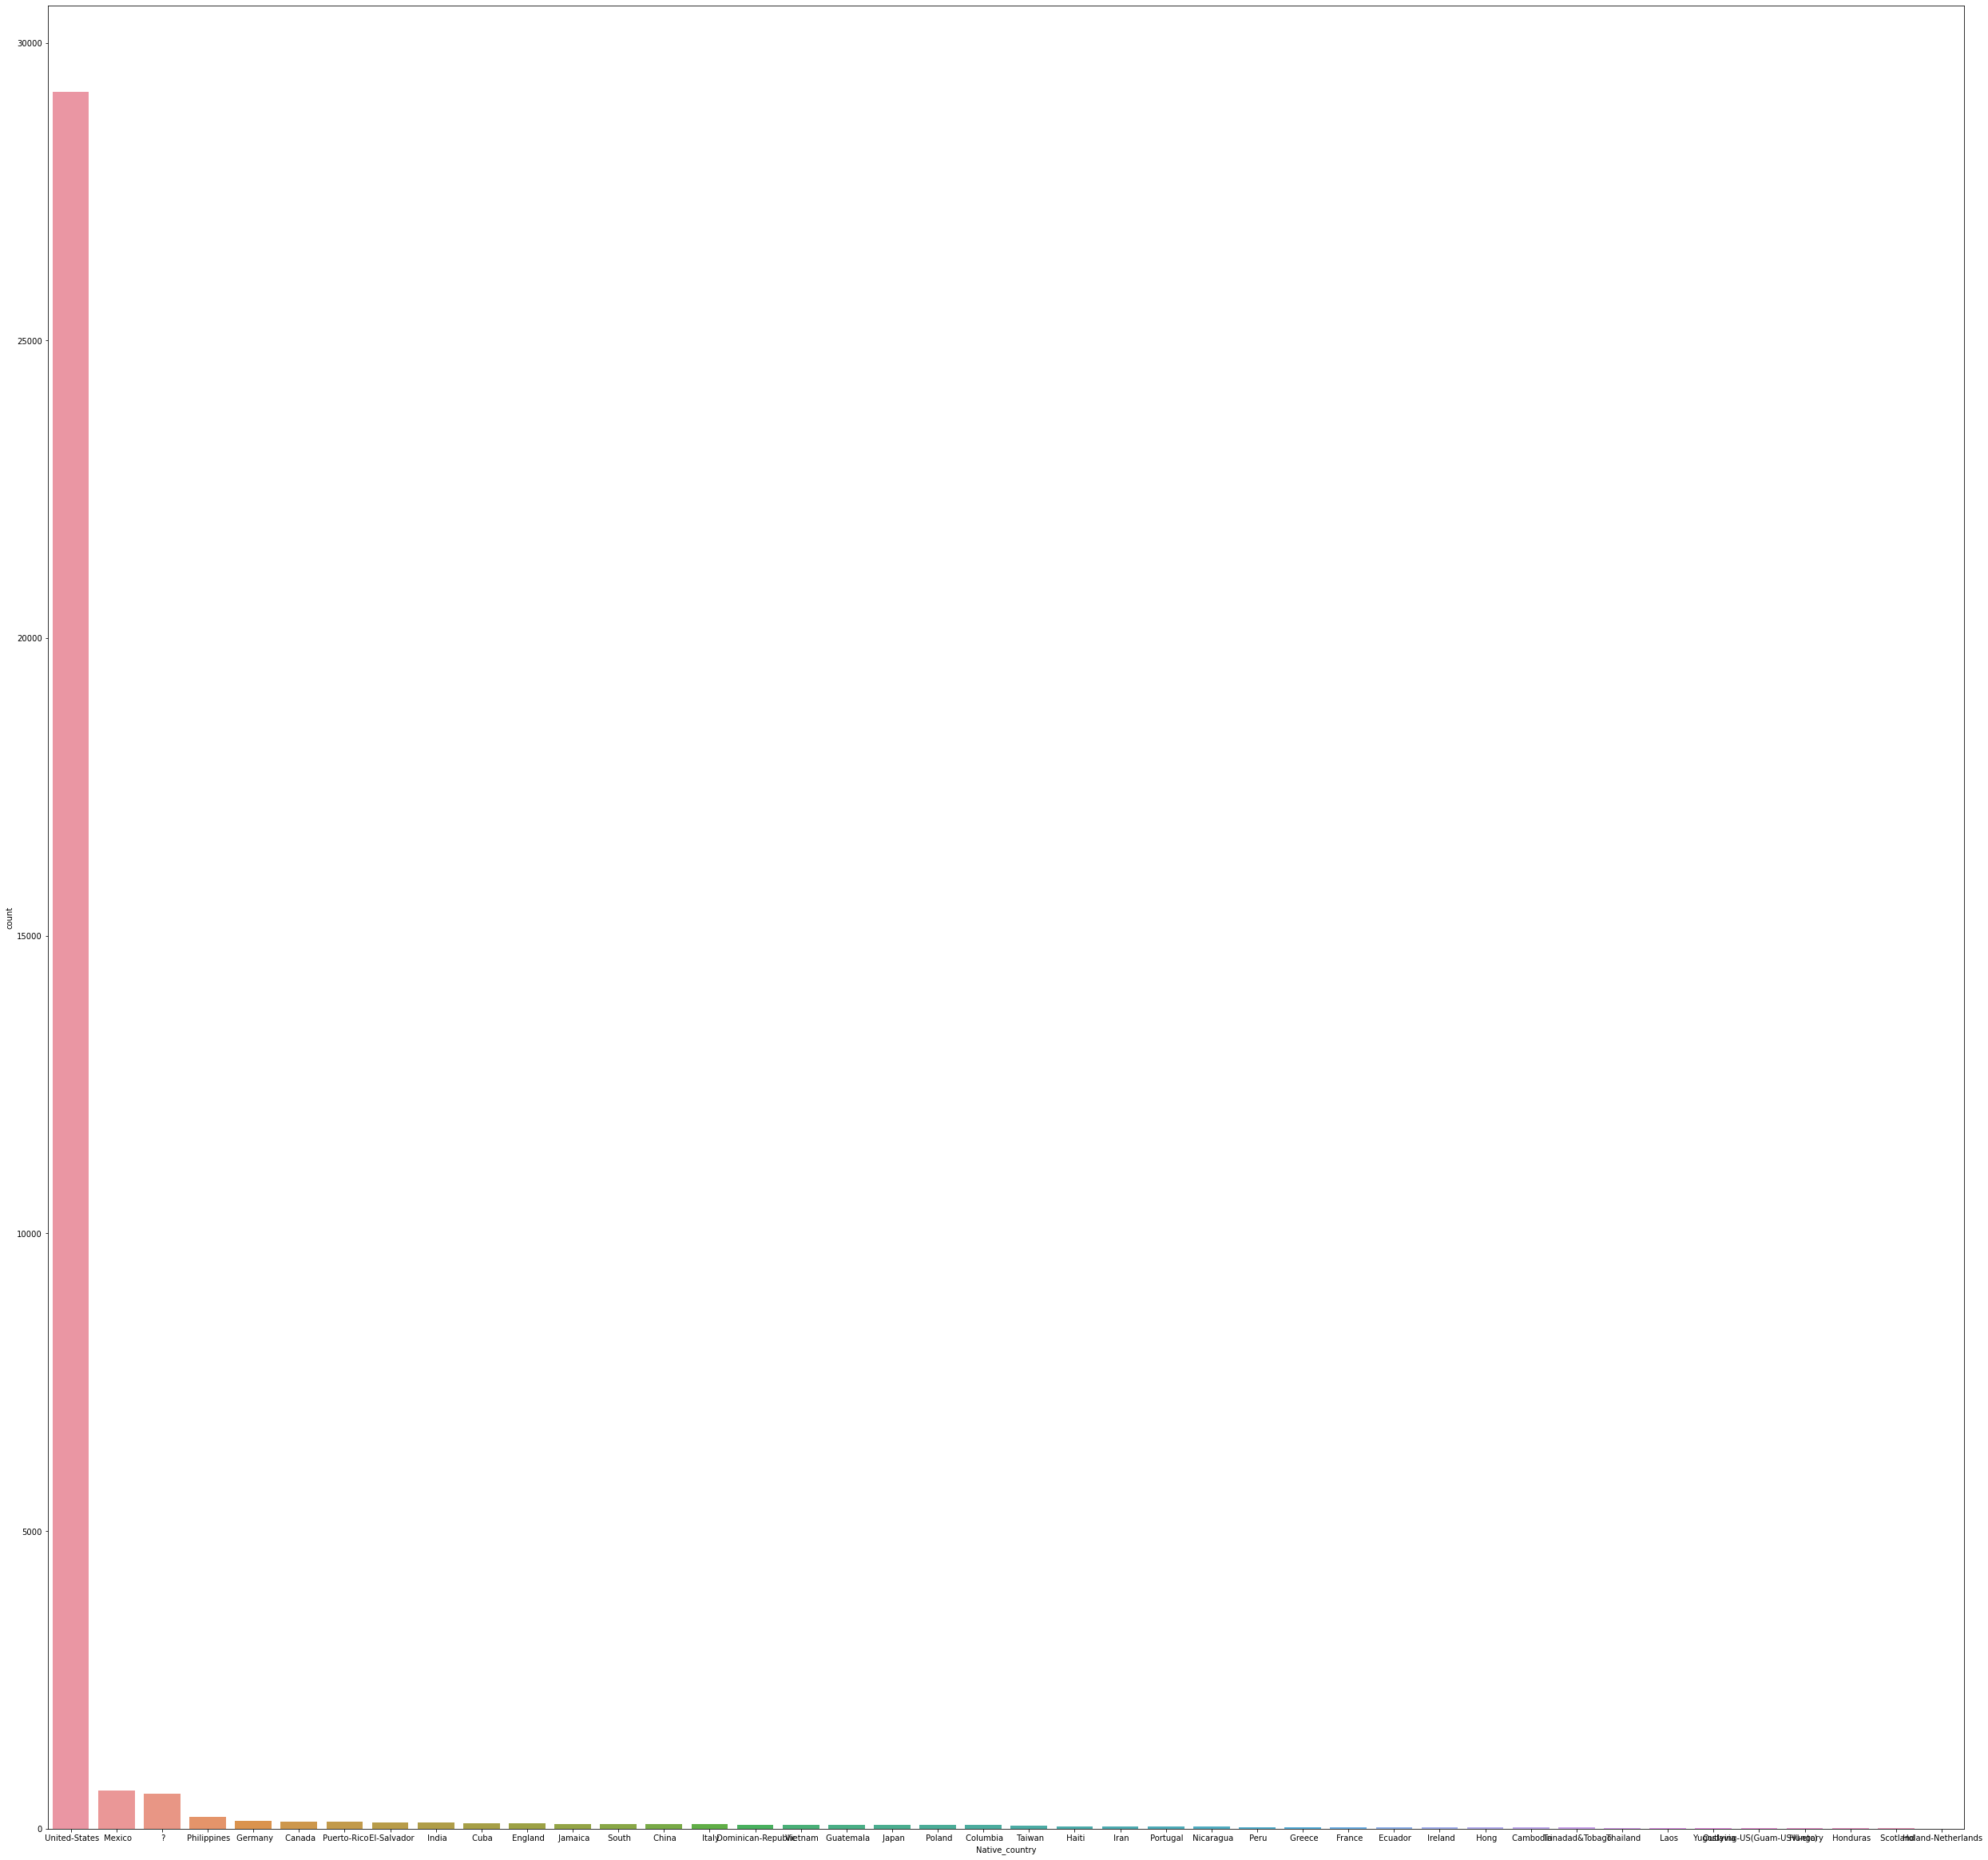

In [27]:
plt.figure(figsize=(43,42))
sb.countplot(df['Native_country'],order=df['Native_country'].value_counts().index)

We see again "?" in this columns we need to work on that, thise are data we need to clean 

<AxesSubplot:xlabel='Education', ylabel='count'>

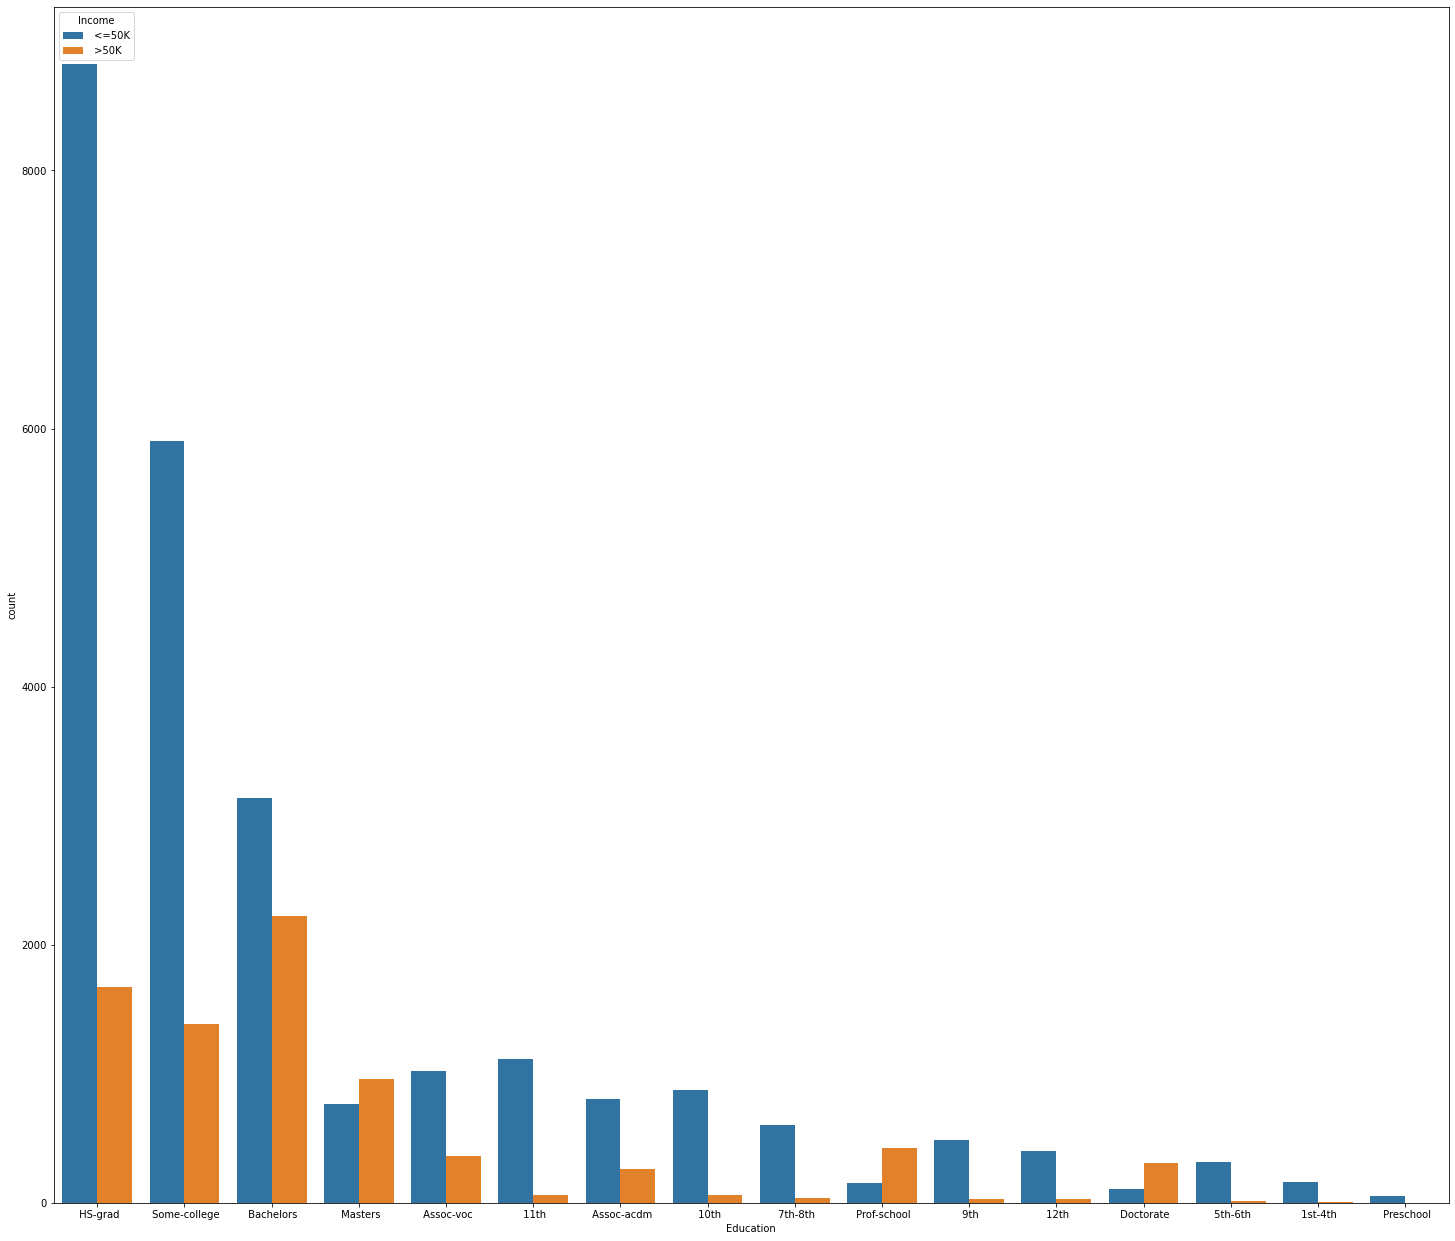

In [28]:
# Education and income 
plt.figure(figsize=(25,22))
sb.countplot(x=df['Education'],hue=df['Income'],order=df['Education'].value_counts().index)

<AxesSubplot:xlabel='Marital_status', ylabel='Hours_per_week'>

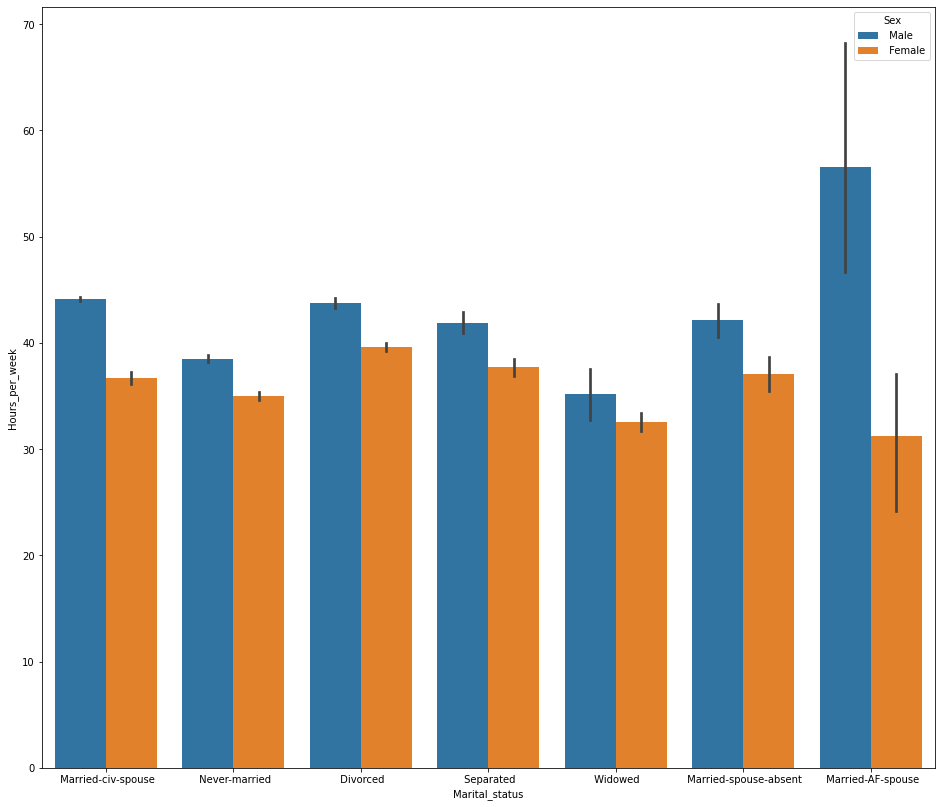

In [29]:
# Matrial status and hours per week 
plt.figure(figsize=(16,14))
sb.barplot(x=df['Marital_status'],y=df['Hours_per_week'],hue=df['Sex'],data=df,order=df['Marital_status'].value_counts().index)

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

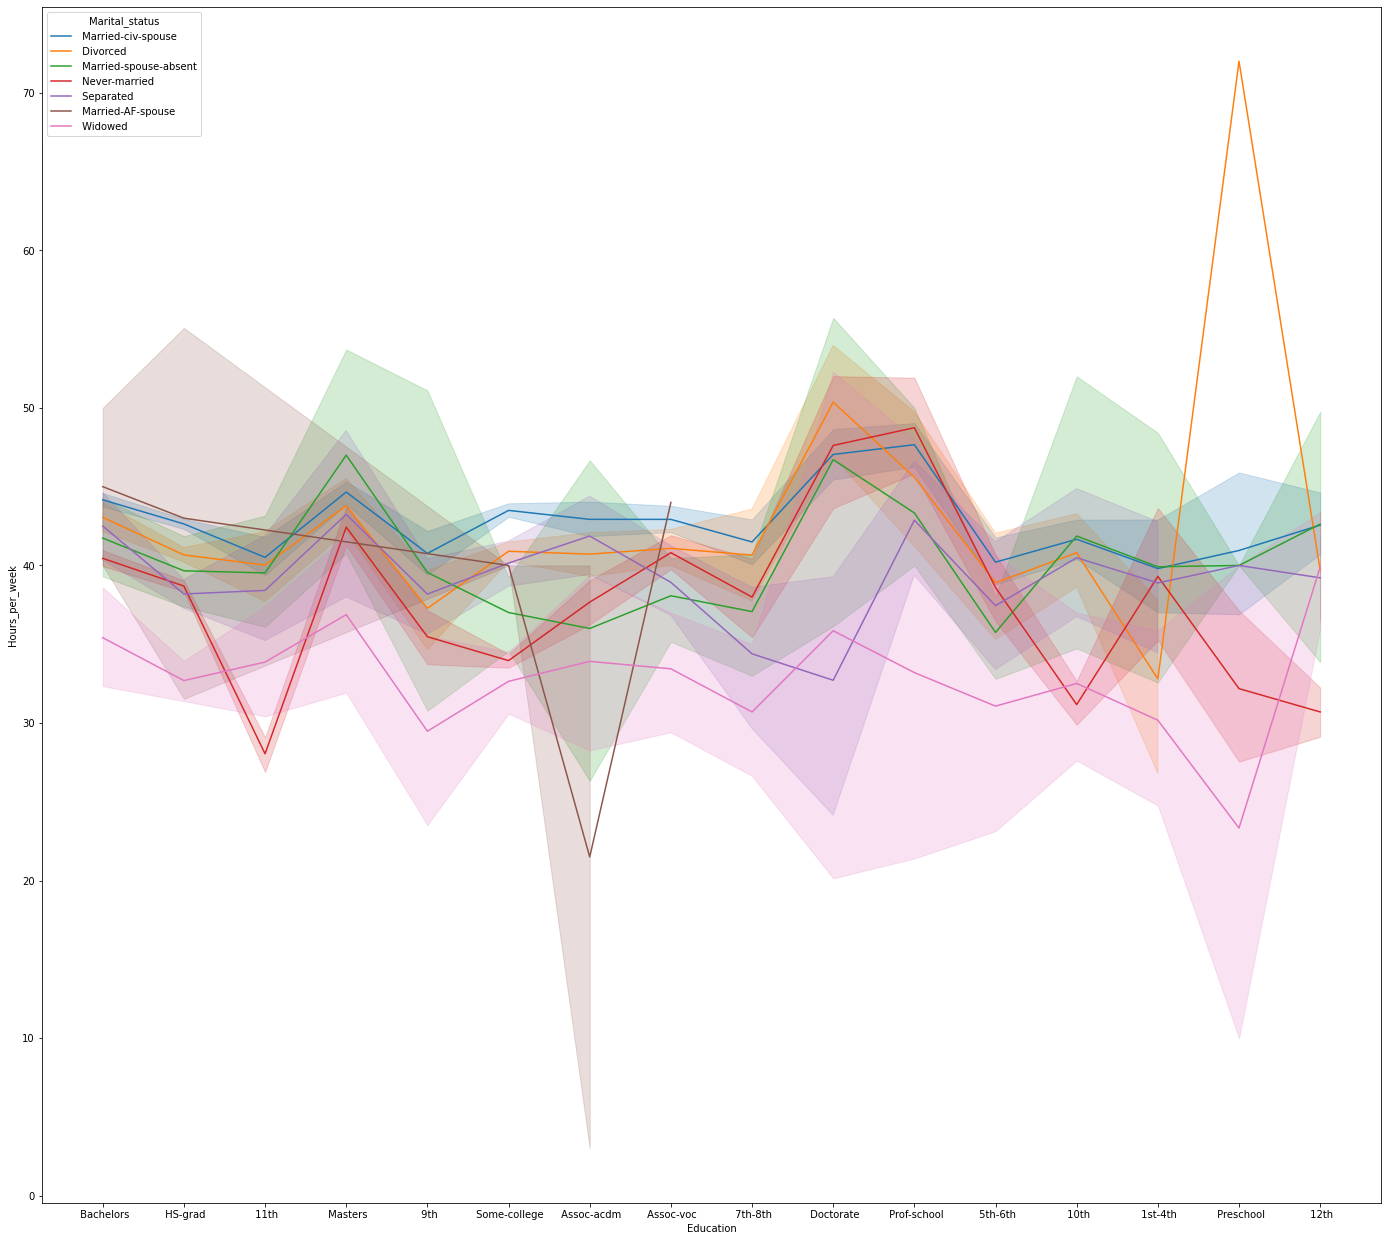

In [30]:
# Education and hours_per_week
plt.figure(figsize=(24,22))
sb.lineplot(x=df['Education'],y=df['Hours_per_week'],hue=df['Marital_status'])

- so here we see the people educated up to preschool has highest working hours and most of them are Divorced
- while the person has Doctrate is also seen working at more hours per than others and on that case also most of them are Divorced
- we see further that Married-AF-spouse which has assoc-acdm has lowest working hours 


<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

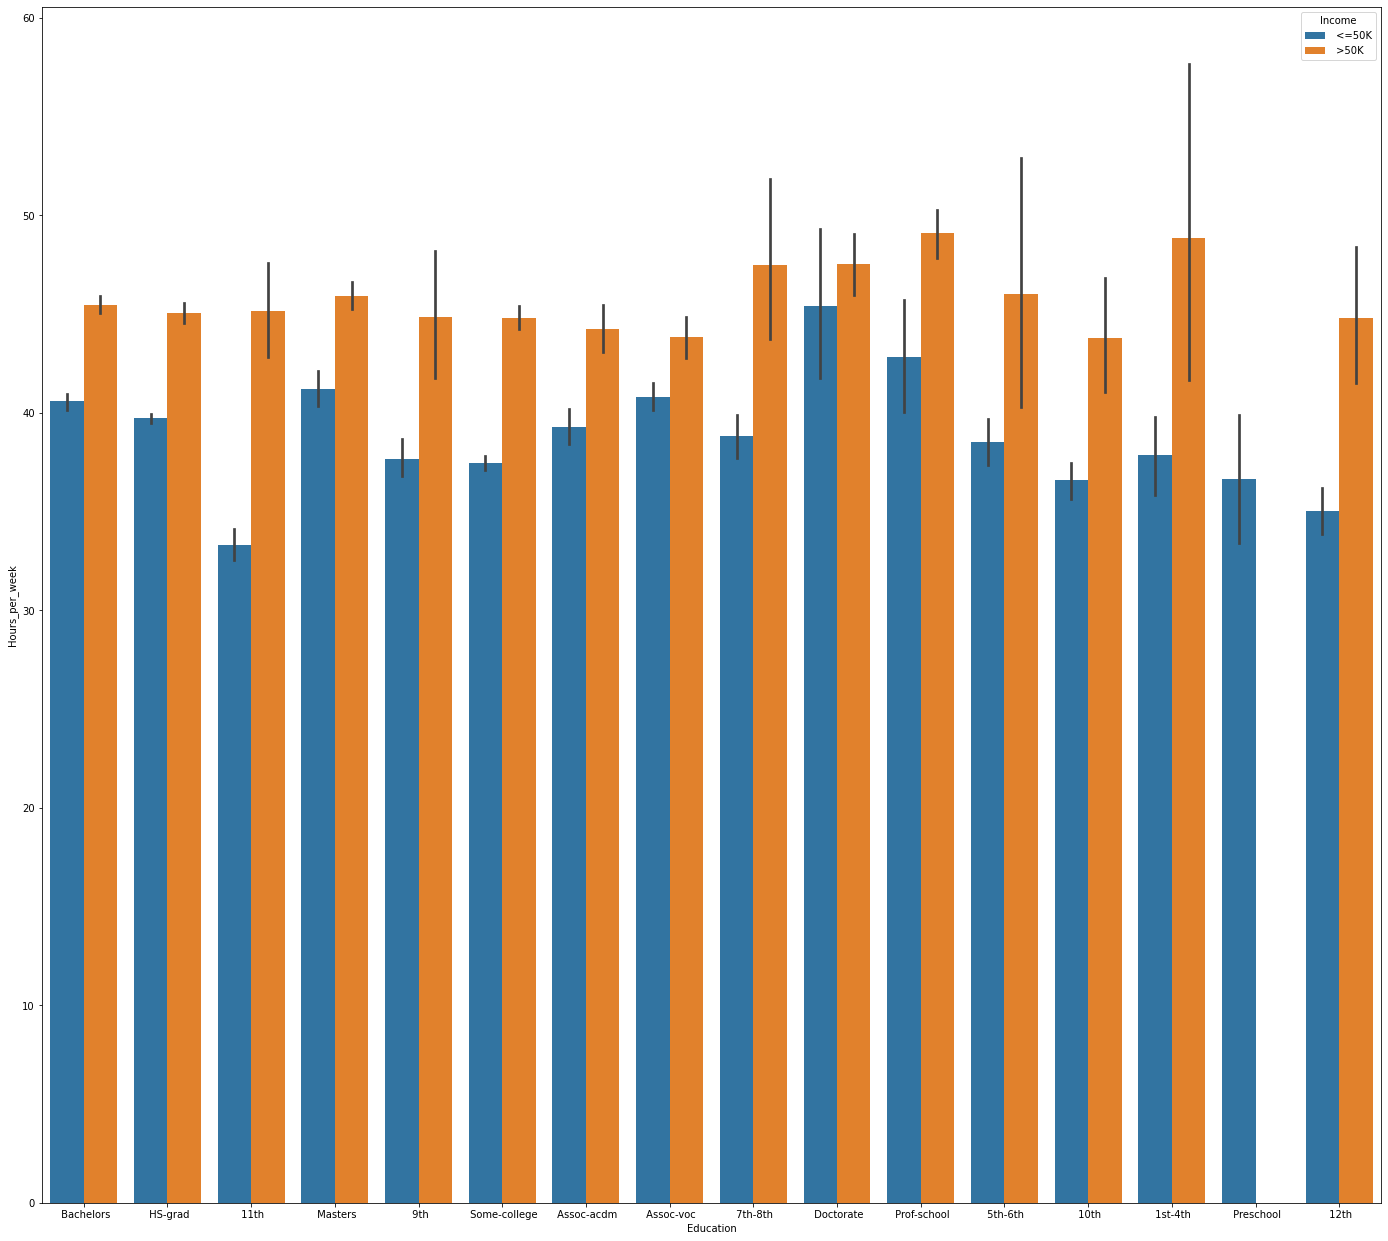

In [31]:
plt.figure(figsize=(24,22))
sb.barplot(x=df['Education'],y=df['Hours_per_week'],hue=df['Income'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

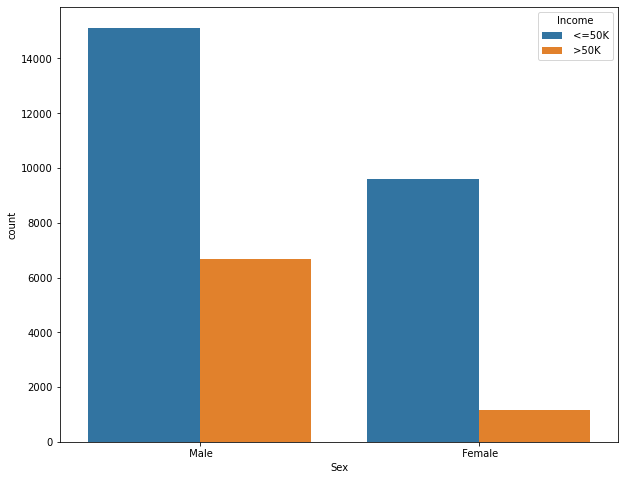

In [32]:
plt.figure(figsize=(10,8))
sb.countplot(x=df['Sex'],hue=df['Income'])

<AxesSubplot:xlabel='Race', ylabel='count'>

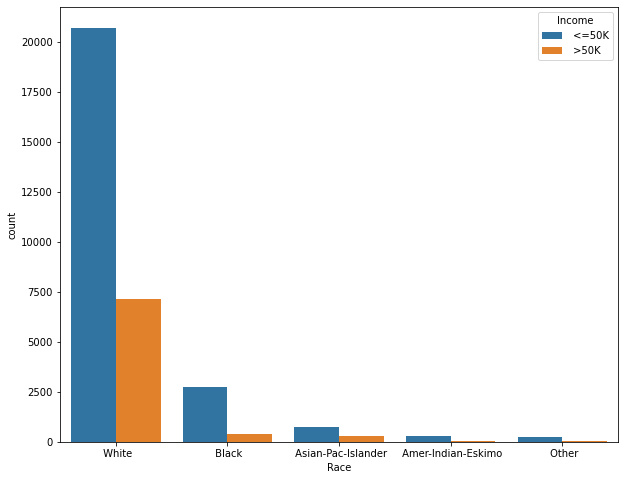

In [33]:
# Income and Race :-
plt.figure(figsize=(10,8))
sb.countplot(x=df['Race'],hue=df['Income'])


- Here ,White race has more income if its less than 50k or more than 50k 
- we also see that black people most of them has less 50k income and only fewer of them has income which is more than 50k 
- although, we see there are people of Asian-pac-Islander has optimistic income, as example if there 15 people and 10- asian peple has less than 50k than through this we say that 5 of 15 has more than 50k of income
 although, any race other than white we see most of them has less than 50k income.
 

<AxesSubplot:xlabel='Education', ylabel='count'>

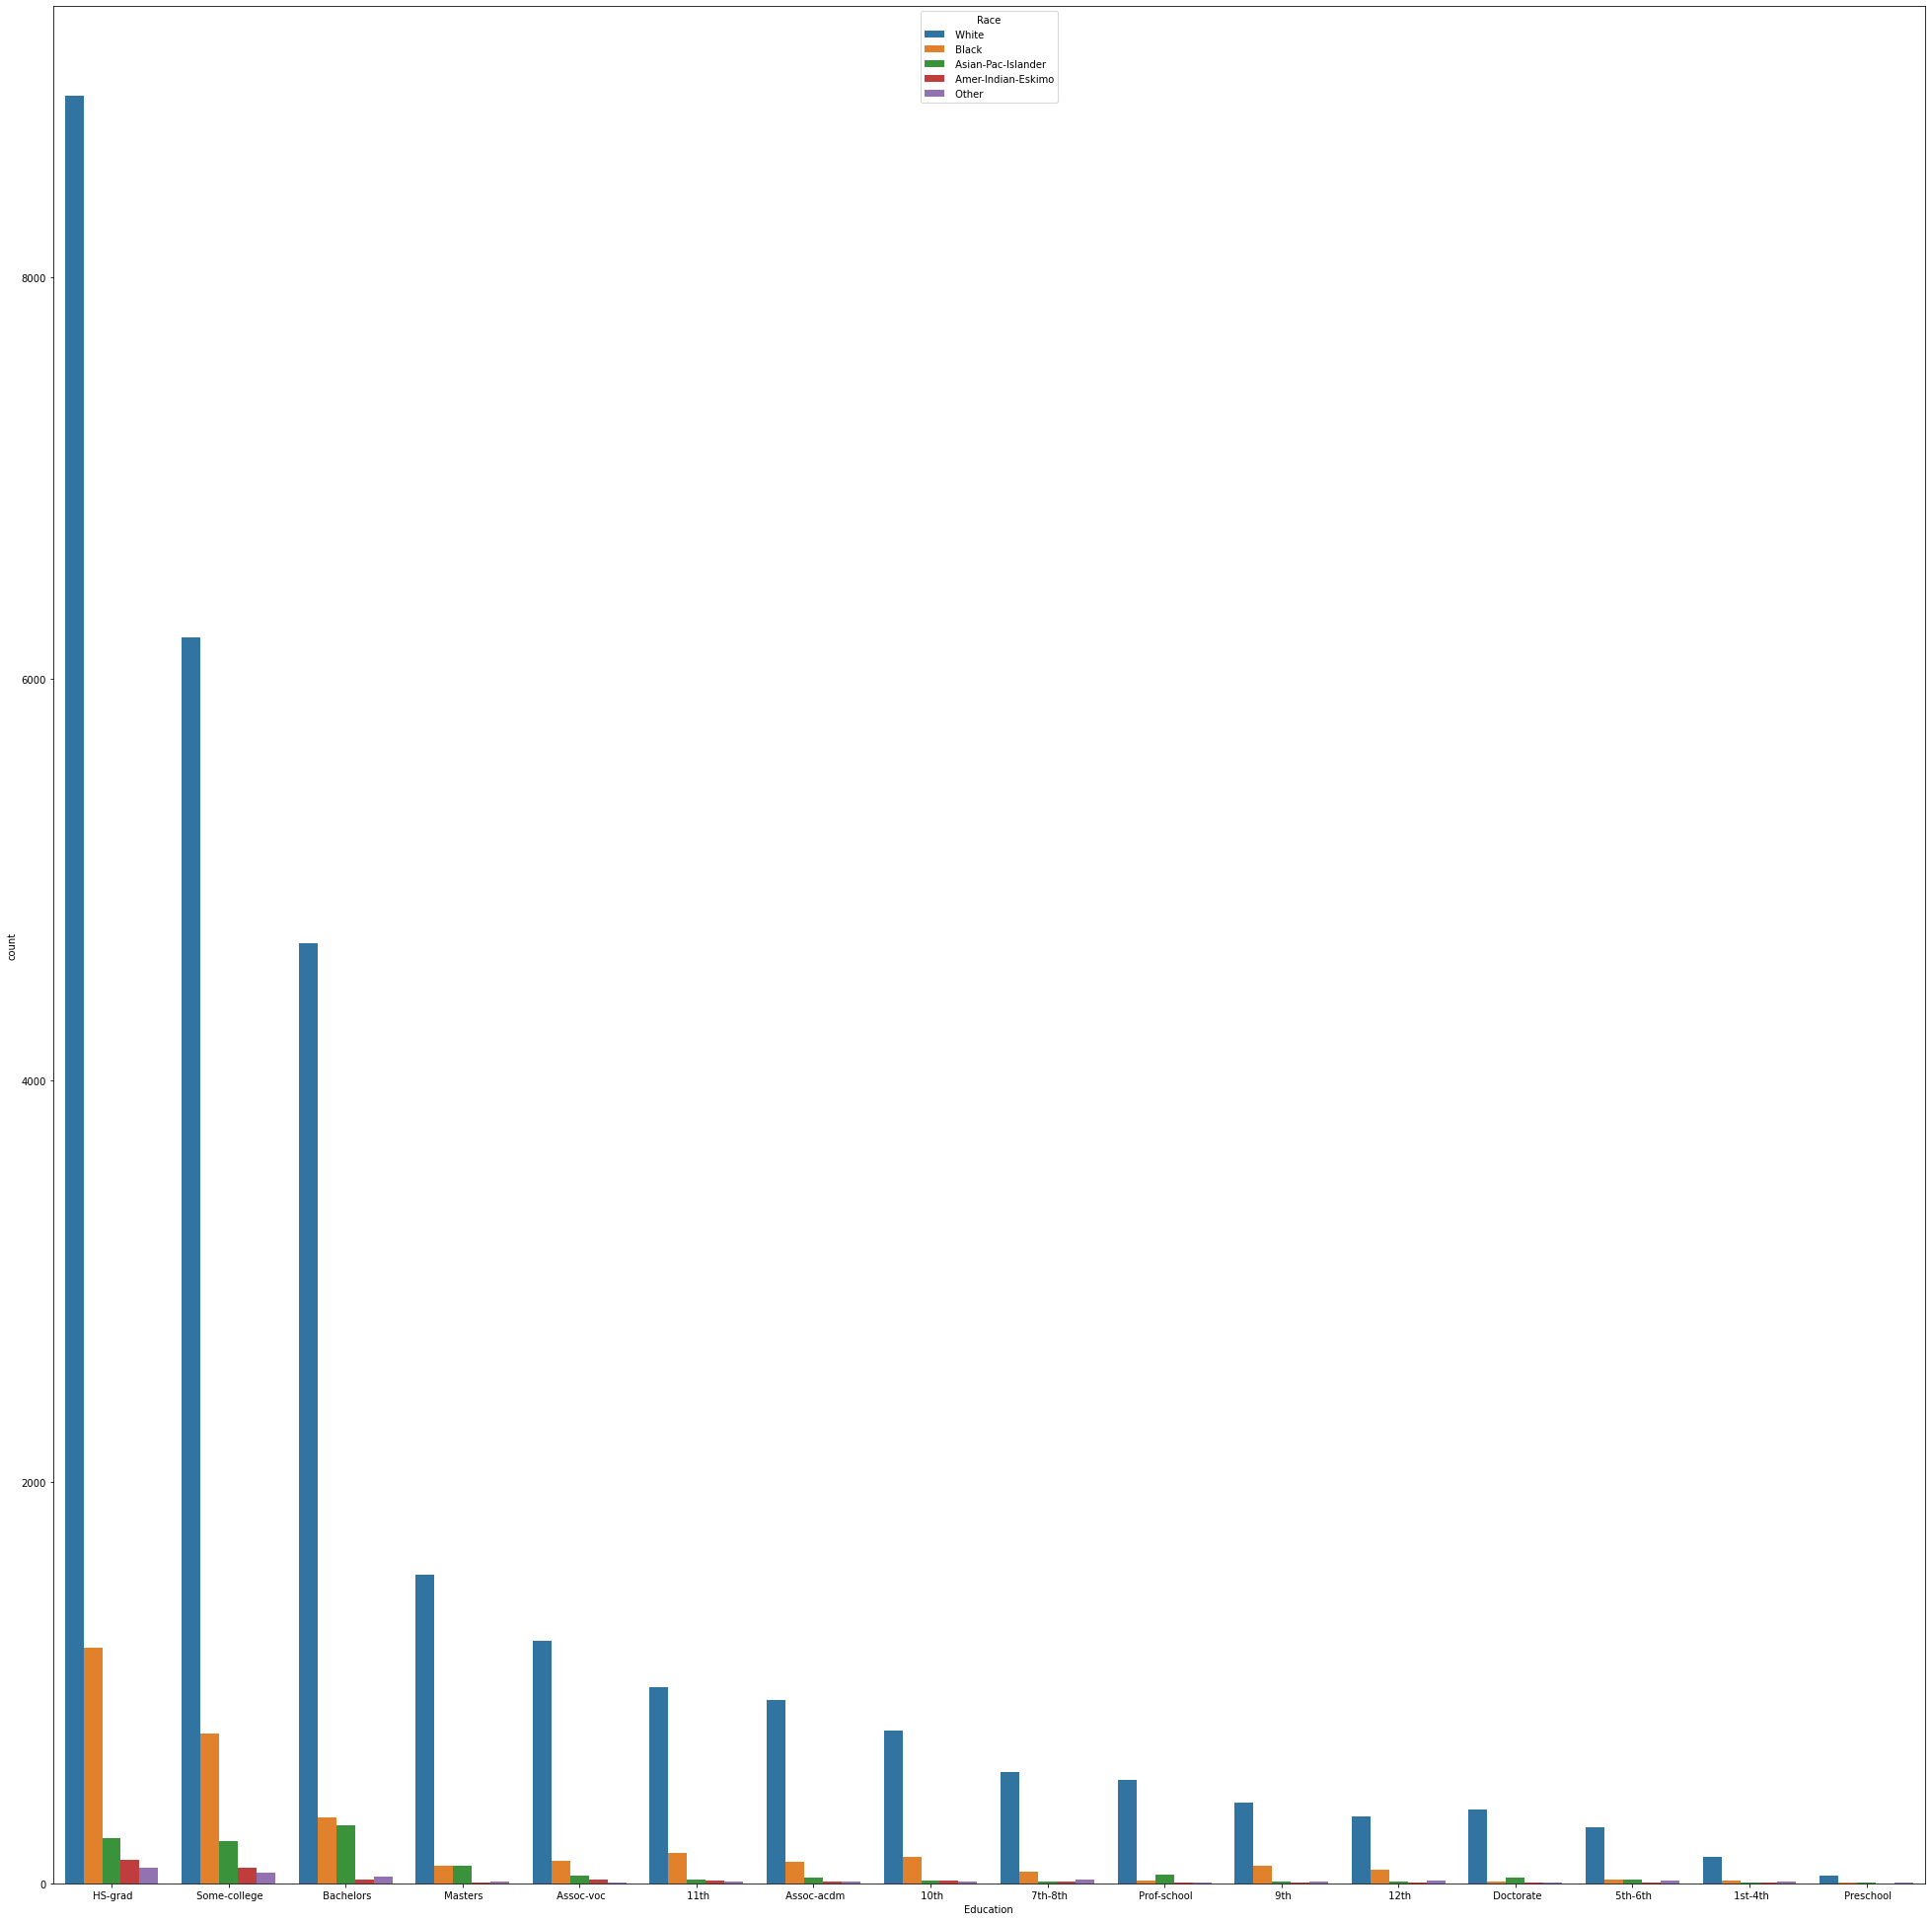

In [34]:
plt.figure(figsize=(34,35))
sb.countplot(x=df['Education'],hue=df['Race'],order=df['Education'].value_counts().index,)

- we see here that white race is higher in every Education yes,beacuse they have the higher population.
- Black race is also seen in most of them they are second highest population.
- Asian has low population rate but has higher growth in Education, even in Doctorate and prof-school we see Asian are more than black, as black race is second Highest race 

<AxesSubplot:xlabel='Education_num', ylabel='count'>

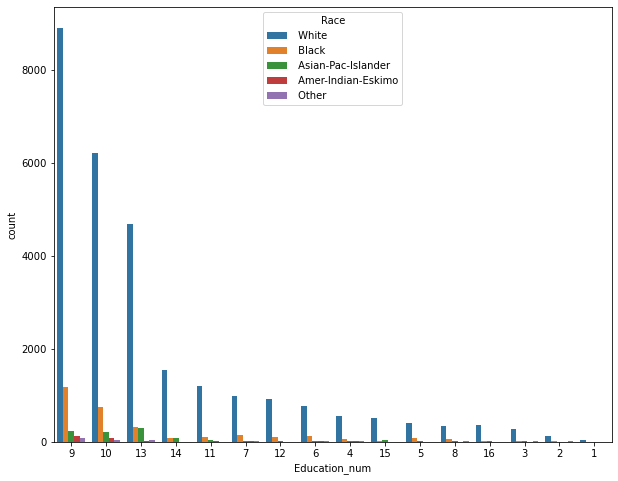

In [35]:
plt.figure(figsize=(10,8))
sb.countplot(x=df['Education_num'],hue=df['Race'],order=df['Education_num'].value_counts().index)

Education num has same values as educations just in numeric form 

<AxesSubplot:xlabel='Race', ylabel='Hours_per_week'>

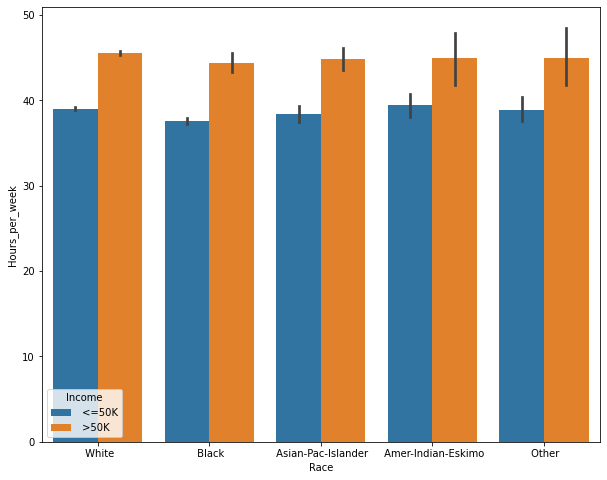

In [36]:
plt.figure(figsize=(10,8))
sb.barplot(x=df['Race'],y=df['Hours_per_week'],data=df,hue=df['Income'])

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

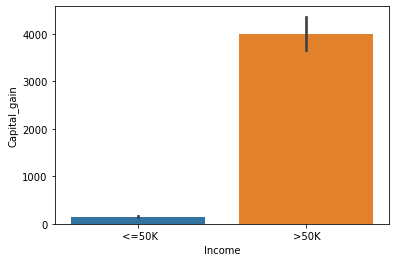

In [37]:
sb.barplot(y=df['Capital_gain'],x=df['Income'],data=df)

<AxesSubplot:xlabel='Race', ylabel='Capital_gain'>

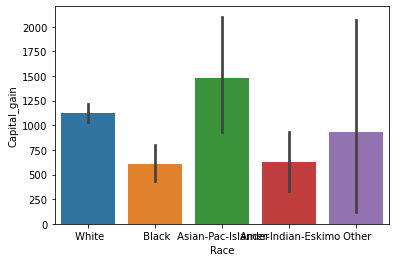

In [38]:
sb.barplot(y=df['Capital_gain'],x=df['Race'],data=df)

<AxesSubplot:xlabel='Education', ylabel='Capital_gain'>

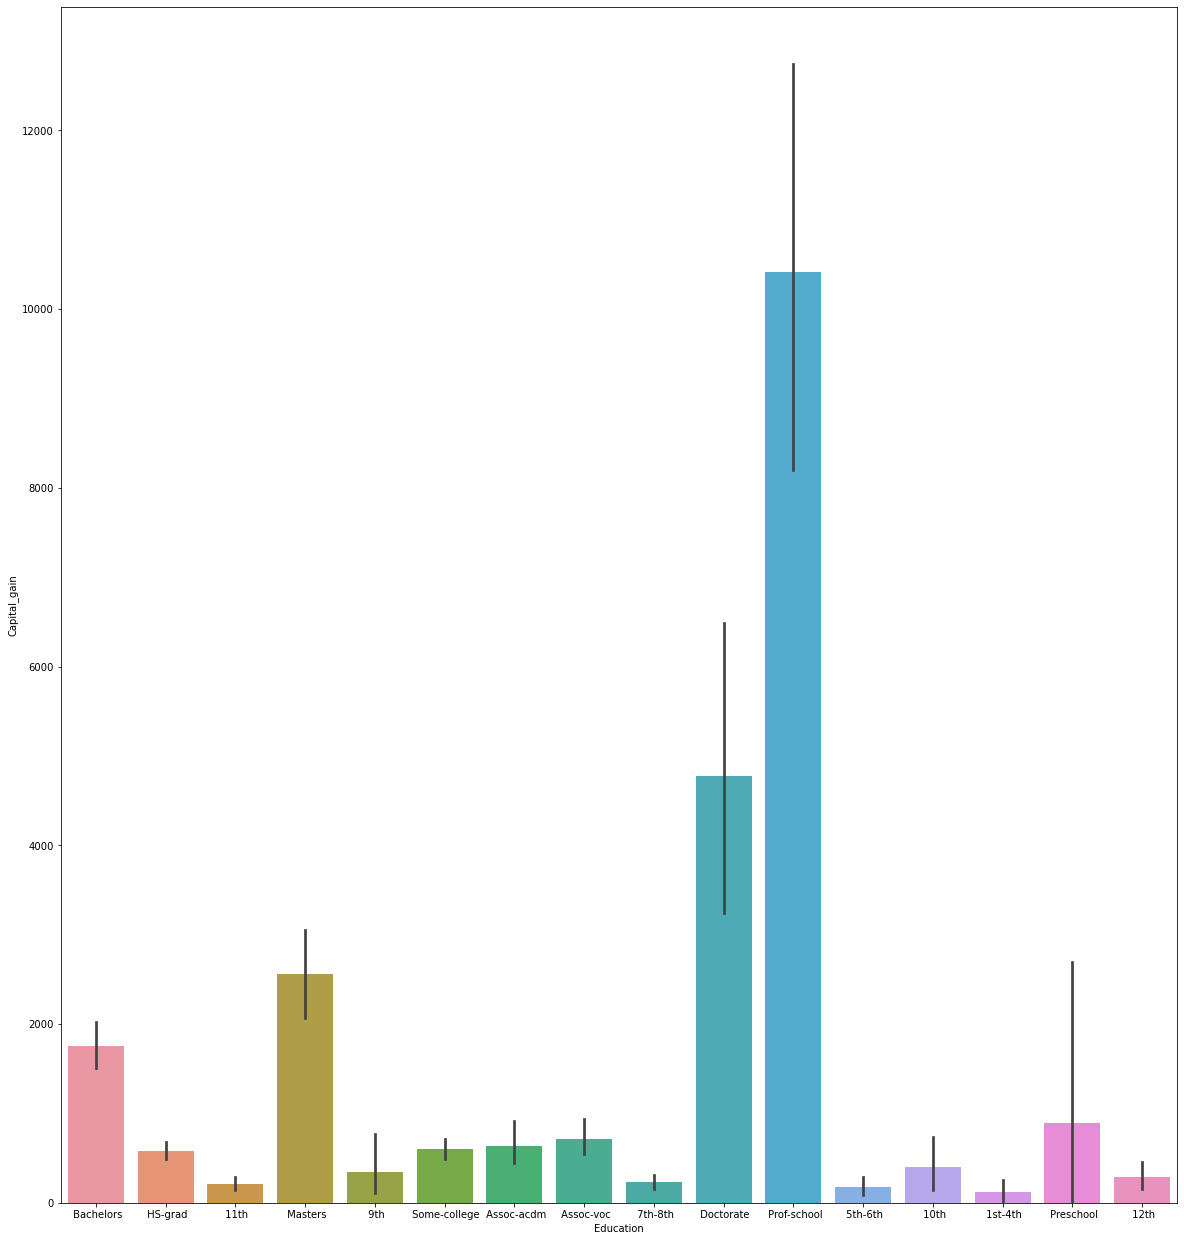

In [39]:
plt.figure(figsize=(20,22))
sb.barplot(y=df['Capital_gain'],x=df['Education'],data=df)

<AxesSubplot:xlabel='Sex', ylabel='Capital_gain'>

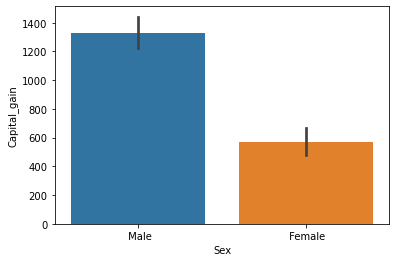

In [40]:
sb.barplot(y=df['Capital_gain'],x=df['Sex'],data=df)

<AxesSubplot:xlabel='Race', ylabel='Capital_loss'>

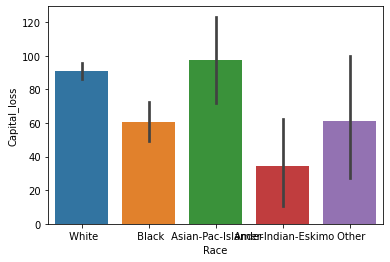

In [41]:
sb.barplot(y=df['Capital_loss'],x=df['Race'],data=df)

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

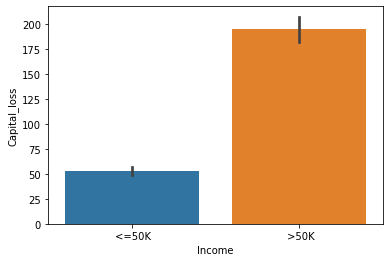

In [42]:
sb.barplot(y=df['Capital_loss'],x=df['Income'],data=df)

<AxesSubplot:xlabel='Education', ylabel='Capital_loss'>

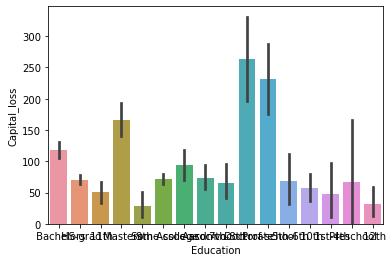

In [43]:
sb.barplot(y=df['Capital_loss'],x=df['Education'],data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Capital_gain'>

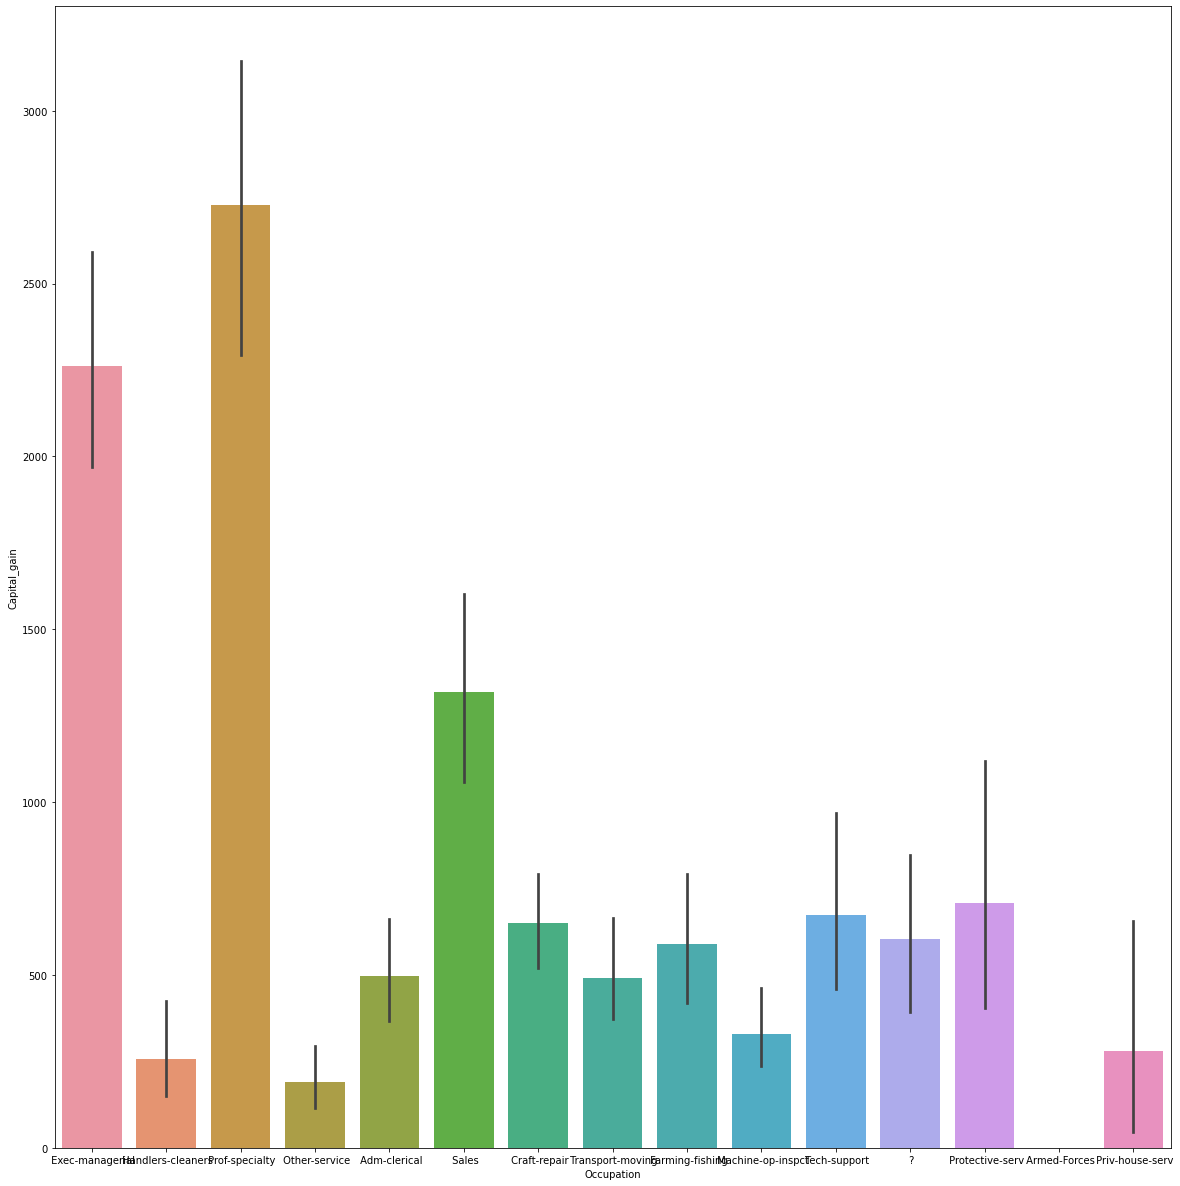

In [44]:
plt.figure(figsize=(20,21))
sb.barplot(y=df['Capital_gain'],x=df['Occupation'],data=df)

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

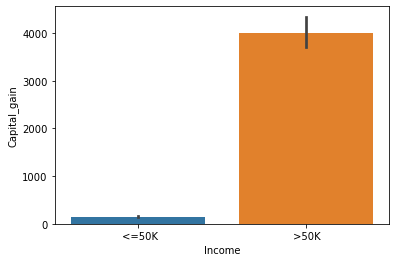

In [45]:
sb.barplot(y=df['Capital_gain'],x=df['Income'],data=df)

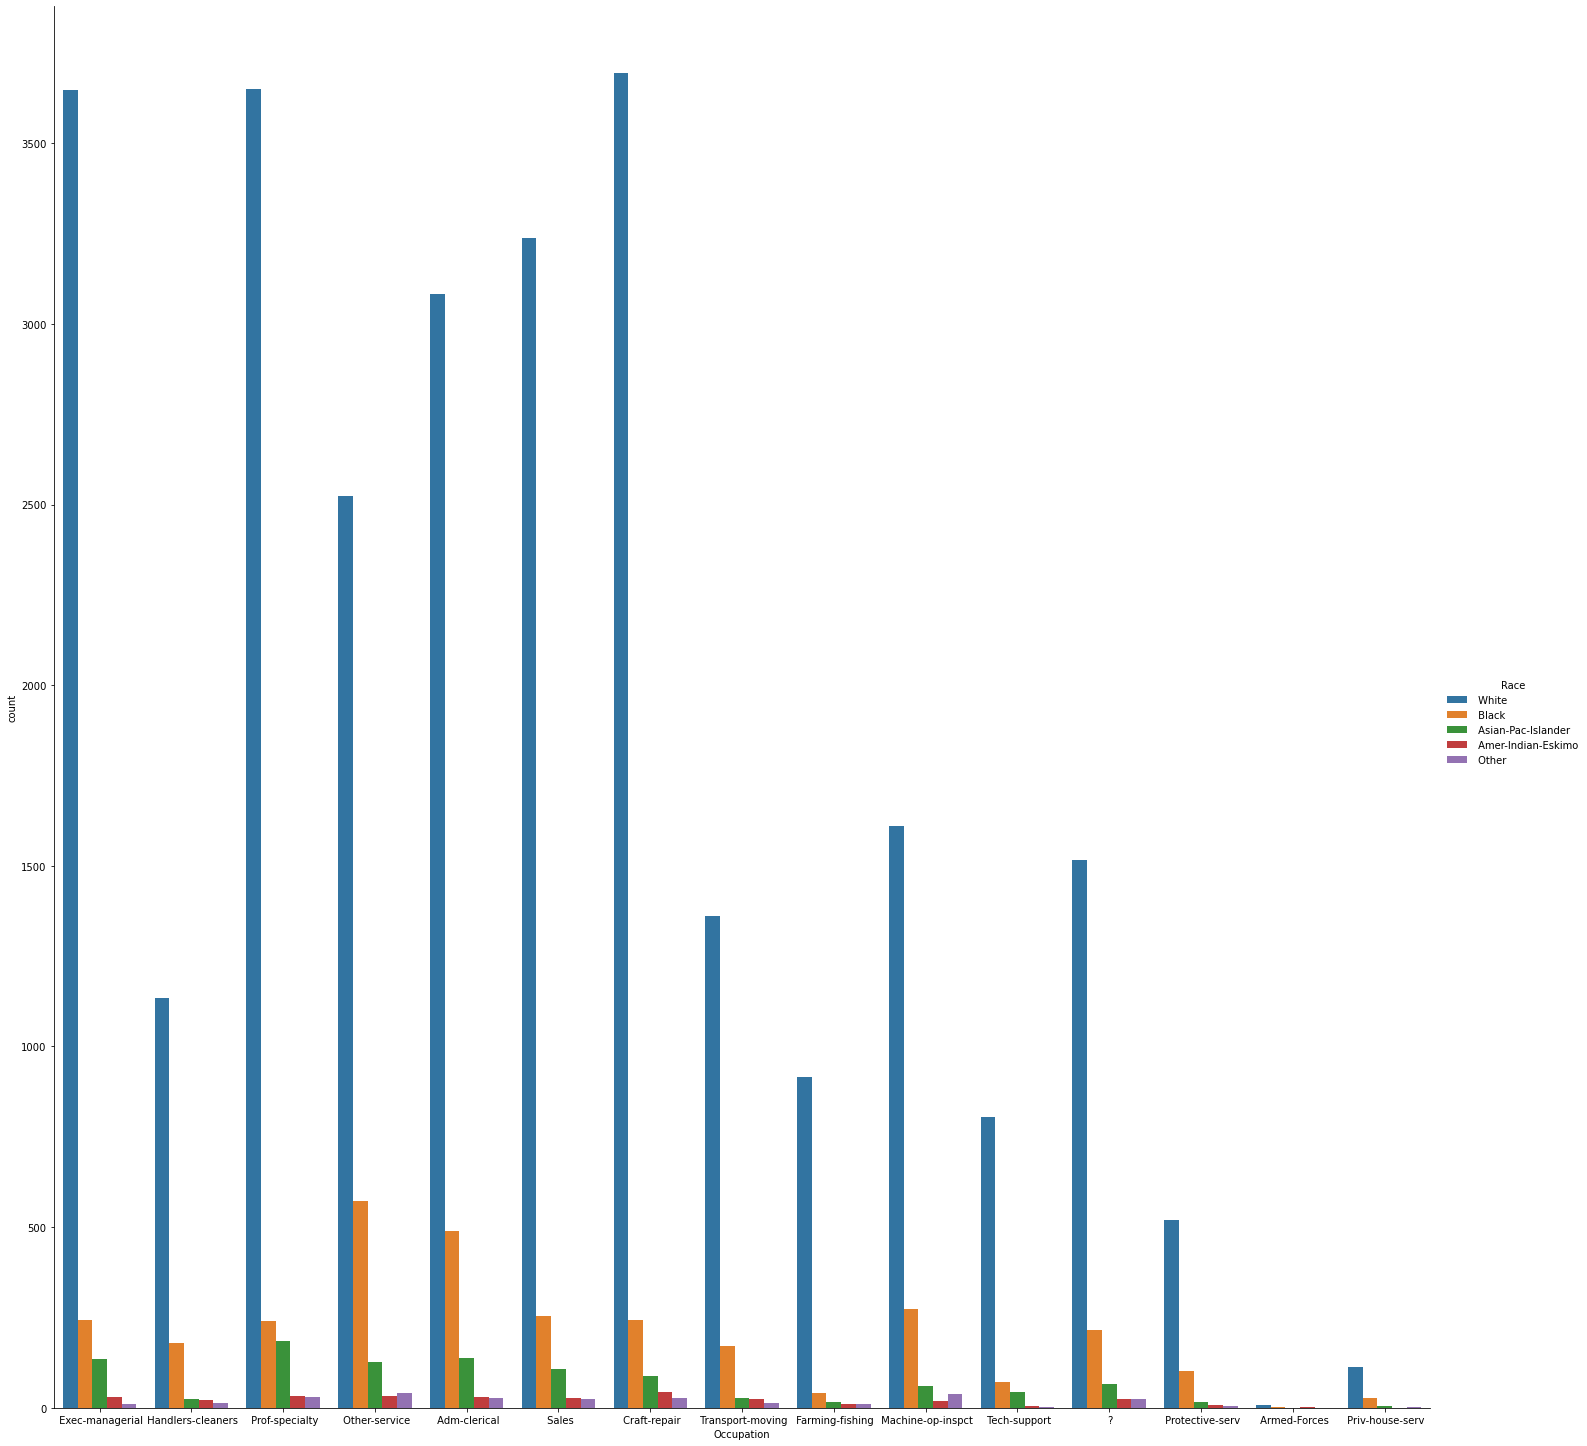

In [46]:
sb.catplot('Occupation',hue='Race',data=df,kind="count",height=20,aspect=1)

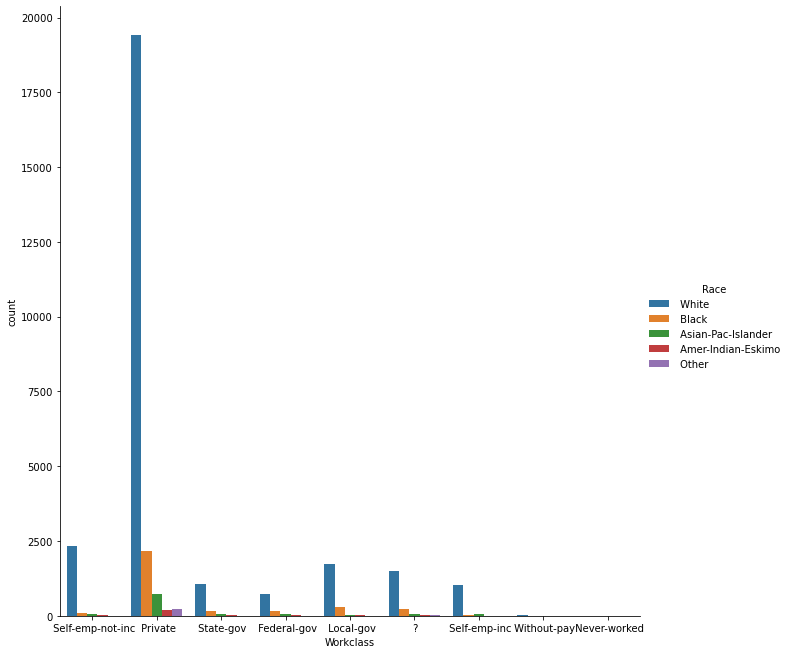

In [47]:

sb.catplot('Workclass',hue='Race',data=df,kind="count",height=9,aspect=1)

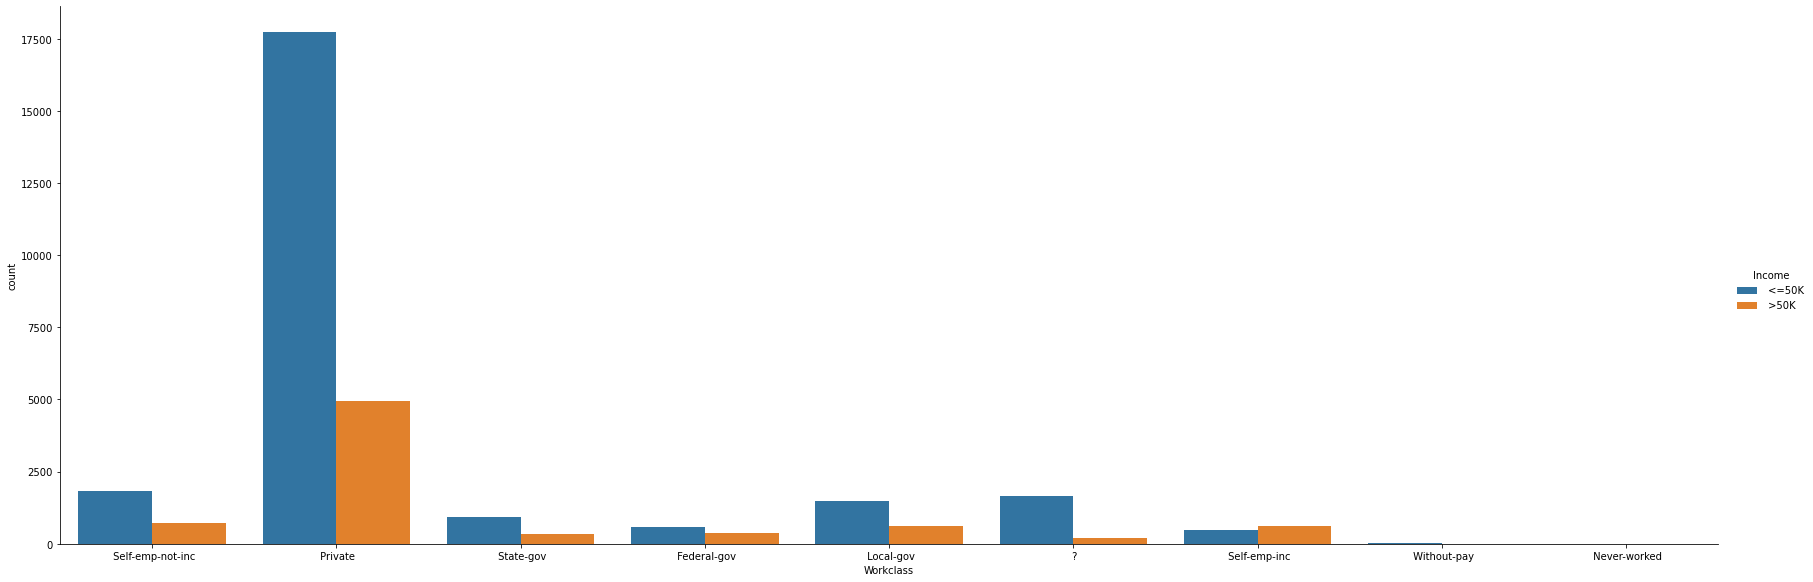

In [48]:
sb.catplot('Workclass',hue='Income',data=df,kind="count",height=8,aspect=3)

# Checking Skewness

In [49]:
conti_data=df[['Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]


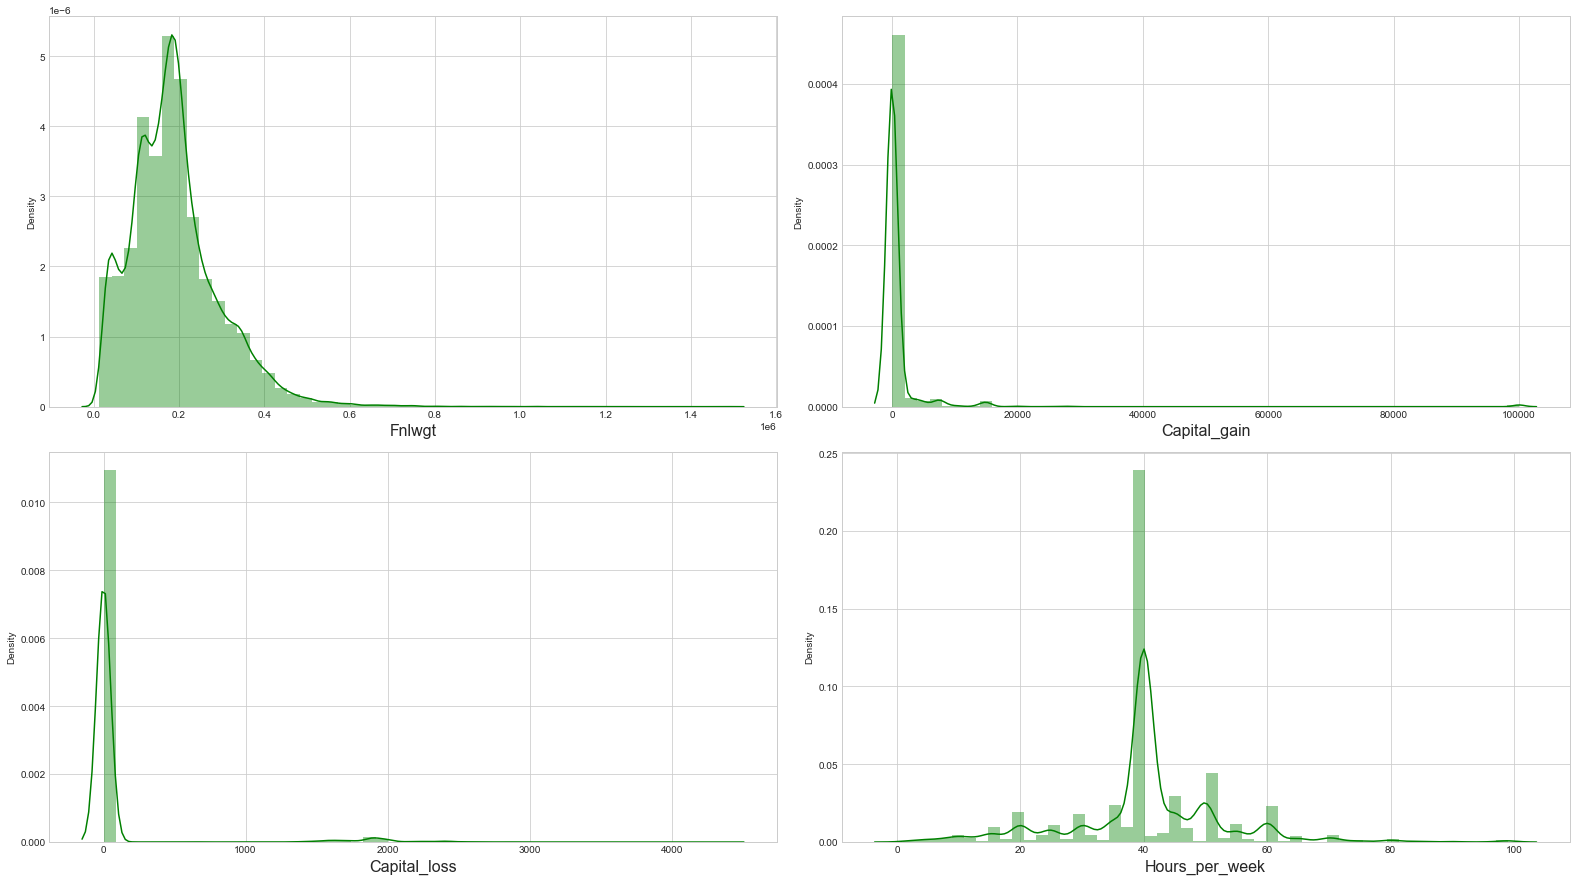

In [50]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(22,24))
num=1

for columns in conti_data:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.distplot(conti_data[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()


- we see here all the continous columns are skewed except Hours_per_week
- Hours_per_week has also skewed but both side , while other are skewed only right side
- we have to remove skewness

# Checking outliers

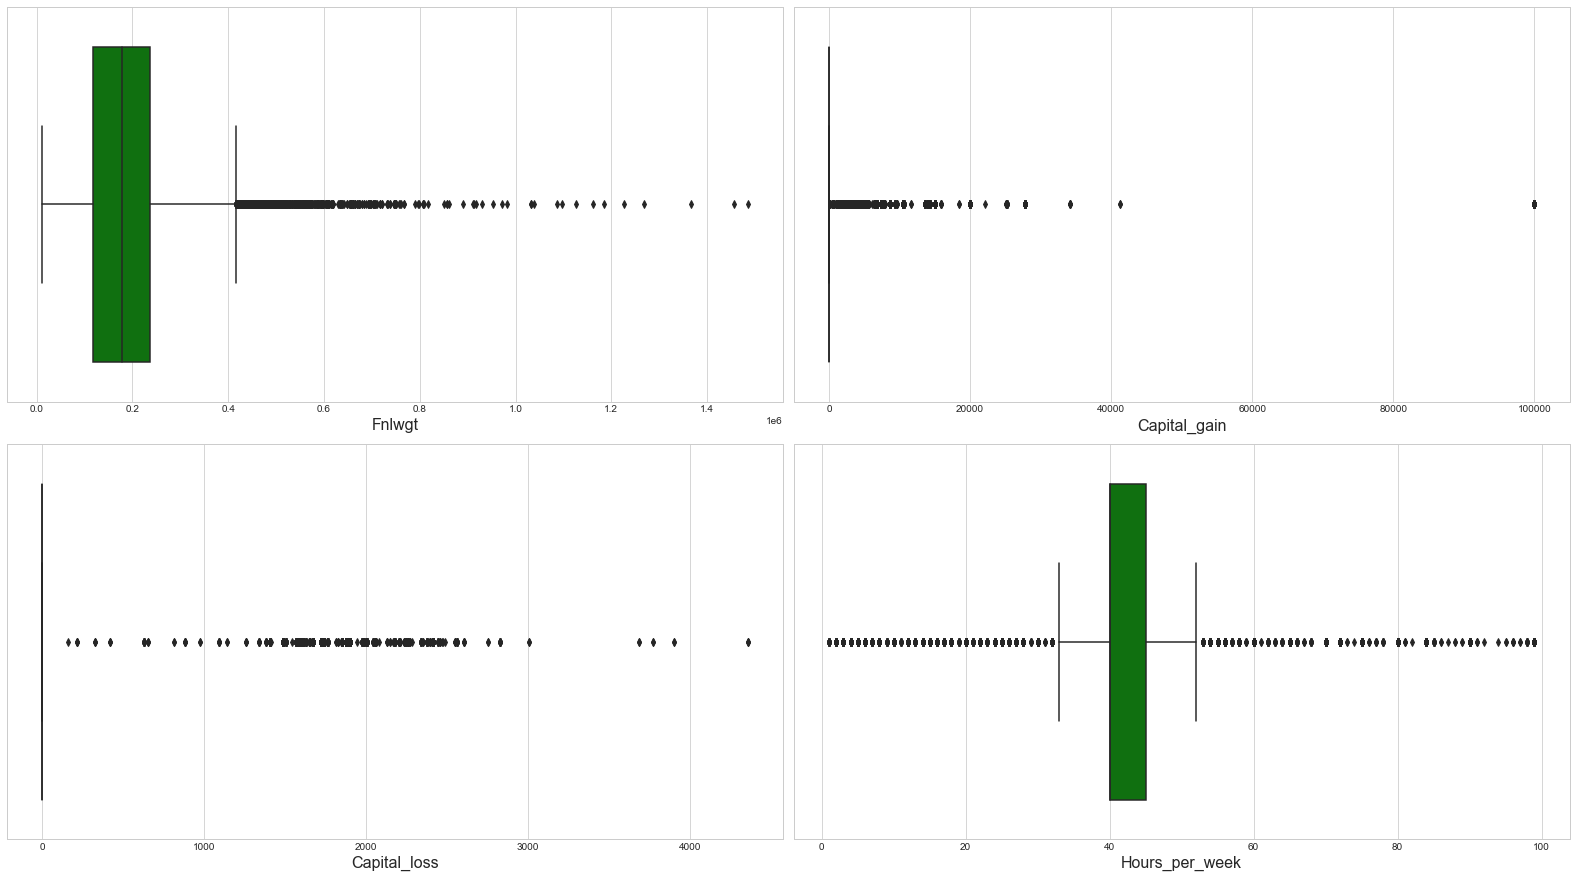

In [51]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(22,24))
num=1

for columns in conti_data:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.boxplot(conti_data[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()


There are lots of outliers we need to work on data, we cannot remove all of them but we need to do some opreations for make date free from baised prediction

## we have some of " ? " in data which are actually None values we need to handle it

In [52]:
print(df['Workclass'].value_counts(),'\n','\n',df['Occupation'].value_counts(),'\n','\n',df['Native_country'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 
 
  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 
 
  United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador            

In these three columns we see "?" in here these are none values 

In [53]:
df=df.replace(' ?',np.nan)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [54]:
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])


In [55]:
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

In [56]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

All the "?" in dataset are removed

In [67]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

# Feature Engineering

In [57]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

these are all columns we see :-
- Age, Workclass, Fnlwgt, Education, Education_num,Marital_status, Occupation, Relationship, Race, 
  Sex,Capital_gain, Capital_loss, Hours_per_week, Native_country,Income

- Here Age, Workclass,Marital_status,Occupation,Relationship,Race,Sex need to encoded not the Education columns it already has Education_num

Age, Workclass,Marital_status,Occupation,Relationship,Race,Sex

In [63]:
# Importing Package:
from sklearn.preprocessing import LabelEncoder

In [64]:
# I am Using here Label encoder , which encode the data in alphabetically manner 
le=LabelEncoder()
df['Age']=le.fit_transform(df['Age'])
df['Workclass']=le.fit_transform(df['Workclass'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])

In [68]:
df['Income'].replace(' <=50K','0',inplace=True)
df['Income'].replace(' >50K','1',inplace=True)

In [69]:
df['Income']=df['Income'].astype('int')

In [70]:
df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

 So, what i did here all the encoded columns are converted into integer or numeric values but in Income we see the object datatype,
i just converted it into 

# Checking Correlation

In [71]:
df.corr().T

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.040539,-0.076648,0.036547,-0.266433,0.001742,-0.263783,0.028751,0.088863,0.077691,0.057780,0.068809,0.234136
Workclass,0.040539,1.000000,-0.024255,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,0.002739
Fnlwgt,-0.076648,-0.024255,1.000000,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036547,0.003445,-0.043159,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.335182
Marital_status,-0.266433,-0.020545,0.028184,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.199295
Occupation,0.001742,0.007236,0.000138,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,0.034599
Relationship,-0.263783,-0.057931,0.008922,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.250924
Race,0.028751,0.048323,-0.021278,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.071853
Sex,0.088863,0.071535,0.026882,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.215995
Capital_gain,0.077691,0.031496,0.000437,0.122627,-0.043398,0.018028,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.223333


<AxesSubplot:>

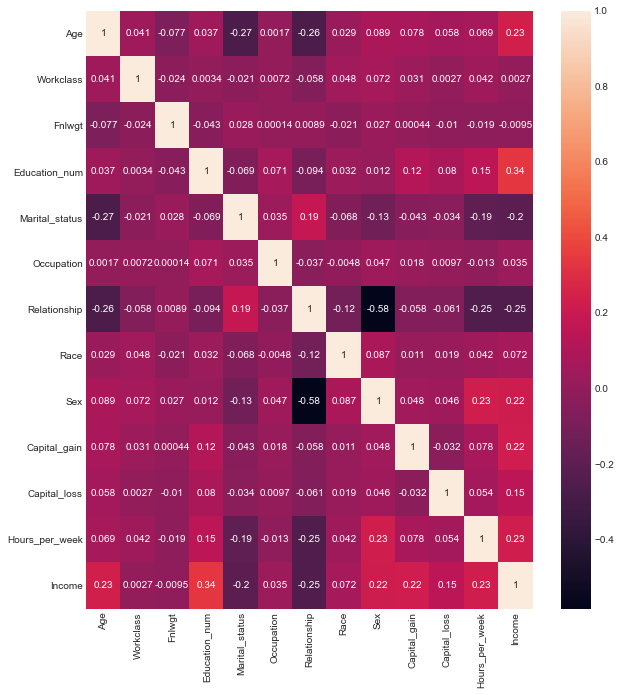

In [72]:
# for better view we use HeatMap:-
plt.figure(figsize=(10,11))
sb.heatmap(df.corr(),annot=True)

- these are correlation of Target with columns:-
  0.234136,0.002739,-0.009481,0.335182,-0.199295,0.034599,-0.250924,0.071853,0.215995,0.223333,0.150523,0.22969,1.000000
- As so far i am not seen any multicollinerity problem
- 0.34 is highest corrleation between income and Education_num
- the between the feature columns we see -0.58 is the strongest but negative correlation between columns sex and Relationship

# Removing Skewness and outliers

In [117]:
df.skew()

Age                0.555583
Workclass          0.076178
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

 - capital Gain is highly skewed
 - capital loss is positively skewed
 - although there are some feature columns they are skewed but not so much 

In [73]:
ddf=df

In [76]:
gf=np.log(conti_data)

In [77]:
from scipy.stats import zscore

In [91]:
z=np.abs(zscore(conti_data))

np.where(z<3)


(array([    0,     0,     0, ..., 32559, 32559, 32559], dtype=int64),
 array([0, 1, 2, ..., 1, 2, 3], dtype=int64))

In [93]:
len(np.where(z>3)[0])
continous_new=conti_data[(z<3).all(axis=1)]
continous_new

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,83311,0,0,13
1,215646,0,0,40
2,234721,0,0,40
3,338409,0,0,40
4,284582,0,0,40
...,...,...,...,...
32555,257302,0,0,38
32556,154374,0,0,40
32557,151910,0,0,40
32558,201490,0,0,20


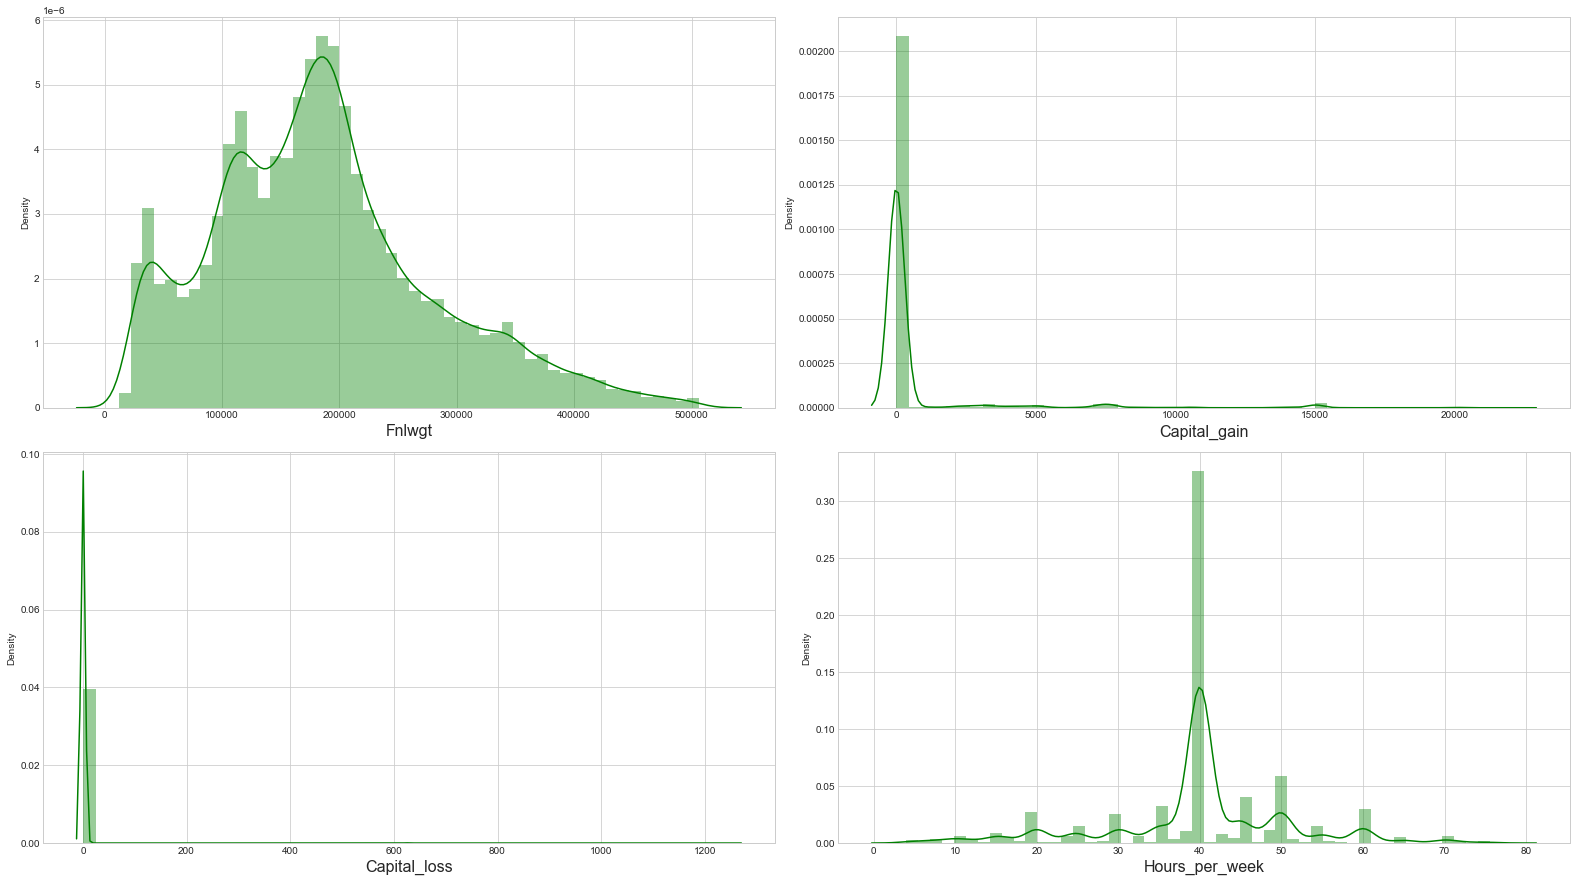

In [94]:

plt.figure(figsize=(22,24))
num=1

for columns in continous_new:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.distplot(continous_new[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()


In [95]:
continous_new

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,83311,0,0,13
1,215646,0,0,40
2,234721,0,0,40
3,338409,0,0,40
4,284582,0,0,40
...,...,...,...,...
32555,257302,0,0,38
32556,154374,0,0,40
32557,151910,0,0,40
32558,201490,0,0,20


In [101]:
df1=df[(z<3).all(axis=1)]
df1.reset_index(inplace=True)

In [102]:
df1.drop('index',axis=1)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,83311,Bachelors,13,2,3,0,4,1,0,0,13,United-States,0
1,21,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,United-States,0
2,36,3,234721,11th,7,2,5,0,2,1,0,0,40,United-States,0
3,11,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,Cuba,0
4,20,3,284582,Masters,14,2,3,5,4,0,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30129,10,3,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,United-States,0
30130,23,3,154374,HS-grad,9,2,6,0,4,1,0,0,40,United-States,1
30131,41,3,151910,HS-grad,9,6,0,4,4,0,0,0,40,United-States,0
30132,5,3,201490,HS-grad,9,4,0,3,4,1,0,0,20,United-States,0


# Checking VIF

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
X=df1.drop(columns=['Education','Native_country','Income'],axis=1)

In [115]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values(by='VIF',ascending=False)


,feature,VIF
8,Race,15.420098
4,Education_num,14.536462
12,Hours_per_week,13.173696
2,Workclass,8.214765
3,Fnlwgt,4.573982
9,Sex,4.326988
5,Marital_status,4.030585
0,index,3.849363
1,Age,3.630702
6,Occupation,3.329888


In [140]:
df1.drop('index',axis=1,inplace=True)

# Feature selection:- 

In [141]:
x=df1.drop(columns=['Education','Native_country','Income'],axis=1)
y=df1['Income']

In [156]:
from sklearn.tree import DecisionTreeClassifier
select= DecisionTreeClassifier()
select.fit(x,y)

DecisionTreeClassifier()

In [159]:
add=select.feature_importances_
add

array([0.12777749, 0.03900574, 0.23911726, 0.11901787, 0.00737808,
       0.06941272, 0.19272837, 0.01576204, 0.00362141, 0.11533838,
       0.00032146, 0.0705192 ])

In [158]:
for index,feature_imp in enumerate(select.feature_importances_):
    print(index , feature_imp)

0 0.1277774850834013
1 0.03900574038962767
2 0.23911725766913766
3 0.11901786874217893
4 0.007378082690374164
5 0.06941271719892027
6 0.1927283668975494
7 0.015762038238944325
8 0.003621406538783836
9 0.11533838414971904
10 0.0003214555689020057
11 0.07051919683246141


In [161]:
imp_feature=pd.DataFrame()
imp_feature['Feature']= x.columns
imp_feature['Values']=select.feature_importances_

In [162]:
imp_feature.sort_values('Values',ascending=False)


,Feature,Values
2,Fnlwgt,0.239117
6,Relationship,0.192728
0,Age,0.127777
3,Education_num,0.119018
9,Capital_gain,0.115338
11,Hours_per_week,0.070519
5,Occupation,0.069413
1,Workclass,0.039006
7,Race,0.015762
4,Marital_status,0.007378


In [165]:
0.127+ 0.039+ 0.239+ 0.119+ 0.007+0.069+ 0.192+ 0.015+ 0.003+ 0.115+0.000+ 0.070

0.9950000000000001

Here, I am not droping any of columns 

# Scaling Data 

In [166]:
from sklearn.preprocessing import StandardScaler

In [168]:
Scale=StandardScaler()
X_scaled=Scale.fit_transform(x)

In [169]:
X_scaled

array([[ 0.85440312,  1.73677521, -1.07869232, ..., -0.24397195,
        -0.03678281, -2.4006777 ],
       [-0.02566651, -0.07871292,  0.3196327 , ..., -0.24397195,
        -0.03678281,  0.01401416],
       [ 1.07442052, -0.07871292,  0.52118973, ..., -0.24397195,
        -0.03678281,  0.01401416],
       ...,
       [ 1.4411162 , -0.07871292, -0.35383723, ..., -0.24397195,
        -0.03678281,  0.01401416],
       [-1.19909267, -0.07871292,  0.17005255, ..., -0.24397195,
        -0.03678281, -1.77464647],
       [ 1.00108139,  0.82903114,  1.08339384, ...,  6.19568077,
        -0.03678281,  0.01401416]])

# Balancing Dataset

In [170]:
from imblearn.over_sampling import SMOTE

In [171]:
sm=SMOTE()

In [172]:
y.value_counts()*100

0    2346100
1     667300
Name: Income, dtype: int64

In [174]:
y.value_counts(normalize=True)*100

0    77.855578
1    22.144422
Name: Income, dtype: float64

In [176]:
new_x,new_y=sm.fit_resample(X_scaled,y)

# Training Data

In [180]:
from sklearn.model_selection import train_test_split

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [184]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

finding best random state

In [186]:
max_accu=0
max_RS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(new_x,new_y,random_state=i,test_size=.20)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accu:
        max_accu=acc
        max_RS=i
print("Best accuracy is ",max_accu,"on Random State =",max_RS)

Best accuracy is  0.7779435269046351 on Random State = 116


In [187]:
 x_train,x_test,y_train,y_test= train_test_split(new_x,new_y,random_state=116,test_size=.20)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

In [190]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svc_model=SVC()
knn_model=KNeighborsClassifier()
rd_model=RandomForestClassifier()
xgb_model=XGBClassifier()
sdg_model=SGDClassifier()
bag_model=BaggingClassifier()
ada_model=AdaBoostClassifier()
gd_model=GradientBoostingClassifier()
et_model=ExtraTreeClassifier()

In [201]:
models=[lr_model,dt_model,svc_model,knn_model,rd_model,xgb_model,sdg_model,bag_model,ada_model,gd_model,et_model]

In [202]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,predict))
    print("F1 Score", f1_score(y_test,predict))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,predict))
    print('Classification_report',classification_report(y_test,predict))
    print('*******************************************')

Accuracy Score of  LogisticRegression() is 0.7779435269046351
F1 Score 0.7774455360956856
Confusion Matrix of  LogisticRegression()  is 
 [[3661 1125]
 [ 959 3640]]
Classification_report               precision    recall  f1-score   support

           0       0.79      0.76      0.78      4786
           1       0.76      0.79      0.78      4599

    accuracy                           0.78      9385
   macro avg       0.78      0.78      0.78      9385
weighted avg       0.78      0.78      0.78      9385

*******************************************
Accuracy Score of  DecisionTreeClassifier() is 0.8616941928609483
F1 Score 0.8604301075268816
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[4086  700]
 [ 598 4001]]
Classification_report               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4786
           1       0.85      0.87      0.86      4599

    accuracy                           0.86      9385
   macro avg       0.86      

In [206]:
from sklearn.model_selection import cross_val_score

In [208]:
for i in models:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test)))
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,new_x,new_y,cv=5, scoring='accuracy').mean())
    print('@'*50)

Accuracy_Score of  LogisticRegression() is 0.7779435269046351
cross Validation accuracy score of  LogisticRegression()  is  0.7690424104598177
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  DecisionTreeClassifier() is 0.8616941928609483
cross Validation accuracy score of  DecisionTreeClassifier()  is  0.861453092830563
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  SVC() is 0.8337773042088439
cross Validation accuracy score of  SVC()  is  0.8339375243275601
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  KNeighborsClassifier() is 0.8645711241342567
cross Validation accuracy score of  KNeighborsClassifier()  is  0.8652662167459001
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  RandomForestClassifier() is 0.9068726691529035
cross Validation accuracy score of  RandomForestClassifier()  is  0.9032456110469946
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  XGBClassifier(base_sco

# Hyperparameter Tuning 

In [212]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [228]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9] 

In [229]:
parameter= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }

In [230]:
random= RandomizedSearchCV(rd_model,param_distributions=parameter,cv=5,n_jobs=-1)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [231]:
random.best_estimator_

RandomForestClassifier(max_depth=227, max_features='auto', min_samples_leaf=4,
                       min_samples_split=3, n_estimators=200)

In [232]:
random.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 227}

In [249]:
Rd_model=RandomForestClassifier( n_estimators = 200,
 min_samples_split = 3,
 min_samples_leaf = 4,
 max_features= 'auto',
 max_depth = 227)

Rd_model.fit(x_train,y_train)
Rd_model_predict=Rd_model.predict(x_test)

In [251]:
accuracy_score(y_test,Rd_model_predict)*100

89.15290356952585

In [252]:
print(classification_report(y_test,Rd_model_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4786
           1       0.87      0.92      0.89      4599

    accuracy                           0.89      9385
   macro avg       0.89      0.89      0.89      9385
weighted avg       0.89      0.89      0.89      9385



In [253]:
confusion_matrix(y_test,Rd_model_predict)

array([[4154,  632],
       [ 386, 4213]], dtype=int64)

accuracy_score is not improving from more than 90%, and the keeping the model as it showing 89.15%


# Ploting Roc_auc Plot

In [237]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


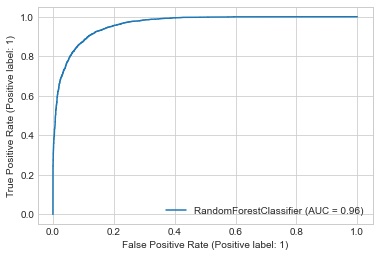

In [241]:

plot_roc_curve(random.best_estimator_,x_test,y_test)

### Accuracy of model is almost 86 % and Area under curve has 96 %
saving the models here

In [254]:
import pickle

In [268]:
Income_file='Income_prediction_model'
with open(Income_file,'wb') as file:
    pickle.dump(Rd_model,file)

In [271]:
rd_classifier=pickle.load(open(Income_file,'rb'))

In [272]:
rd_classifier

RandomForestClassifier(max_depth=227, max_features='auto', min_samples_leaf=4,
                       min_samples_split=3, n_estimators=200)